# Data-X Project: Electricity Price Prediction
## Electricity Price Prediction - EPPdf Maker

This notebook was used to create various transformations of our dataset by applying features to functions, eliminating features based on correlation, creatingg aggregates of multiple features, appling PCA dimensionality transformations, selecting top features by recursive feature elimination (RFE), and performing timeshifts on features. It outpus a collection of csv files (EPPdf#.csv) for testing in the "Model Docket" portion of the main project pipeline notebook.

Note: This notebook requires "helper_functions.py" to run

Team Members: Aaron Drew, Arbaaz Shakir, John Stuart, Adam Yankelevits, Eric Yehl

**Note:** This notebook needs to be launched by typing: 
jupyter lab Project.ipynb --NotebookApp.iopub_data_rate_limit=10000000000

## Import Libraries

Import open source packages and files defining custom functions.

In [1]:
%run helper_functions.py 

## Data Collection

Source data streams for a particular region (probably manual).

## Data Aggregation

Stitch many data streams into a Google Sheet and create a pandas dataframe by importing from Sheets API.

Columns: Features

Rows: Timestamps

In [2]:
#%run helper_functions.py 
#raw_data_full = import_sheet('TOY DATA 2')

#raw_data = import_sheet('TOY DATA')
raw_data_full = pd.read_csv('FINAL DATA_18 Apr_no0.csv')
#raw_data = pd.read_csv('TOY DATA.csv')
raw_data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 97 columns):
AllFuelsGen                                                                           199 non-null float64
CoalGen                                                                               199 non-null float64
PetroleumGen                                                                          199 non-null float64
NatGasGen                                                                             199 non-null float64
OtherGasGen                                                                           199 non-null float64
NuclearGen                                                                            199 non-null float64
HydroGen                                                                              199 non-null float64
RenewablesGen                                                                         199 non-null float64
HydroStorageGen                        

In [3]:
raw_data = raw_data_full.iloc[:].reset_index(drop=True)
raw_data.head()

AllFuelsGen  CoalGen  PetroleumGen  NatGasGen  OtherGasGen  NuclearGen  \
0     16618.89   199.86        263.92   10192.49        97.57     2380.00   
1     14380.39   184.14        175.65    8870.58       101.84     2229.87   
2     15848.63   102.50        119.55    9474.18       103.13     2468.63   
3     15841.02   205.59         90.02    9208.77        92.26     2318.67   
4     16874.50   200.48        103.19    9698.87       108.04     1667.93   

   HydroGen  RenewablesGen  HydroStorageGen  OtherGen     ...      \
0   1590.10        1717.40           -36.26     18.03     ...       
1   1290.01        1504.66          -172.96     17.30     ...       
2   1764.77        1788.32          -152.66     16.49     ...       
3   2096.46        1797.49          -143.87     13.42     ...       
4   3045.22        1831.97            34.61     16.19     ...       

   SCE Adj Close  SCE Volume  Federal Interest Rates  Inflation   XLE Open  \
0       4.437073    136100.0                    5.98     0.0373  33.750000   
1       4.580492     51200.0                    5.49     0.0353  32.130001   
2       4.078519     42400.0                    5.31     0.0292  31.850000   
3       3.226961     39600.0                    4.80     0.0327  30.500000   
4       3.137323     38800.0                    4.21     0.0362  33.580002   

    XLE High    XLE Low  XLE Close  XLE Adj Close  XLE Volume  
0  34.109379  30.187500  32.130001      23.161621     4092000  
1  34.040001  31.549999  31.740000      22.880482     4613800  
2  34.349998  29.450001  30.700001      22.130783     6845600  
3  34.240002  29.049999  33.869999      24.489994     4746100  
4  34.900002  31.809999  33.549999      24.258610     9348600  

[5 rows x 97 columns]

In [4]:
raw_data = raw_data.dropna()
raw_data.to_csv('EPPdf1.csv', sep=',')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 198
Data columns (total 97 columns):
AllFuelsGen                                                                           199 non-null float64
CoalGen                                                                               199 non-null float64
PetroleumGen                                                                          199 non-null float64
NatGasGen                                                                             199 non-null float64
OtherGasGen                                                                           199 non-null float64
NuclearGen                                                                            199 non-null float64
HydroGen                                                                              199 non-null float64
RenewablesGen                                                                         199 non-null float64
HydroStorageGen                        

# sets the prediction length for test data

In [6]:
%run helper_functions.py

pred_len = 60
#raw_all_data = flip_df(raw_data)  data is already in order
raw_train_data = raw_data.iloc[0:len(raw_data)-pred_len]
raw_test_data = raw_data.iloc[-pred_len:]
raw_test_data.shape

(60, 97)

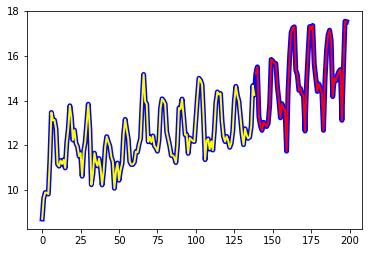

In [7]:
plt.plot(np.arange(len(raw_data)), raw_data['Price'], color='blue',
                 linewidth=5)

plt.plot(np.arange(len(raw_test_data))+len(raw_data)-pred_len, raw_test_data['Price'], color='red',
                 linewidth=2)
plt.plot(np.arange(len(raw_train_data)), raw_train_data['Price'], color='yellow',
                 linewidth=2)

plt.show()

# rescales full data and test data

In [9]:
%run helper_functions.py

#performs the train test split
std_all_data, all_rescaler = standardize(raw_data, feature_range=[2,4], comp_var='Price')
std_train_data, test_rescaler1 = standardize(raw_train_data, feature_range=[2,4], comp_var='Price')
std_test_data, test_rescaler1 = standardize(raw_test_data, feature_range=[2,4], comp_var='Price')
std_all_data.to_csv('EPPdf2.csv', sep=',')
std_all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 97 columns):
AllFuelsGen                                                                           199 non-null float64
CoalGen                                                                               199 non-null float64
PetroleumGen                                                                          199 non-null float64
NatGasGen                                                                             199 non-null float64
OtherGasGen                                                                           199 non-null float64
NuclearGen                                                                            199 non-null float64
HydroGen                                                                              199 non-null float64
RenewablesGen                                                                         199 non-null float64
HydroStorageGen                        

## Exploratory Data Analysis with Correlation Matrices

### Pearson correlation matrix "heat map" for colinearity between all features.

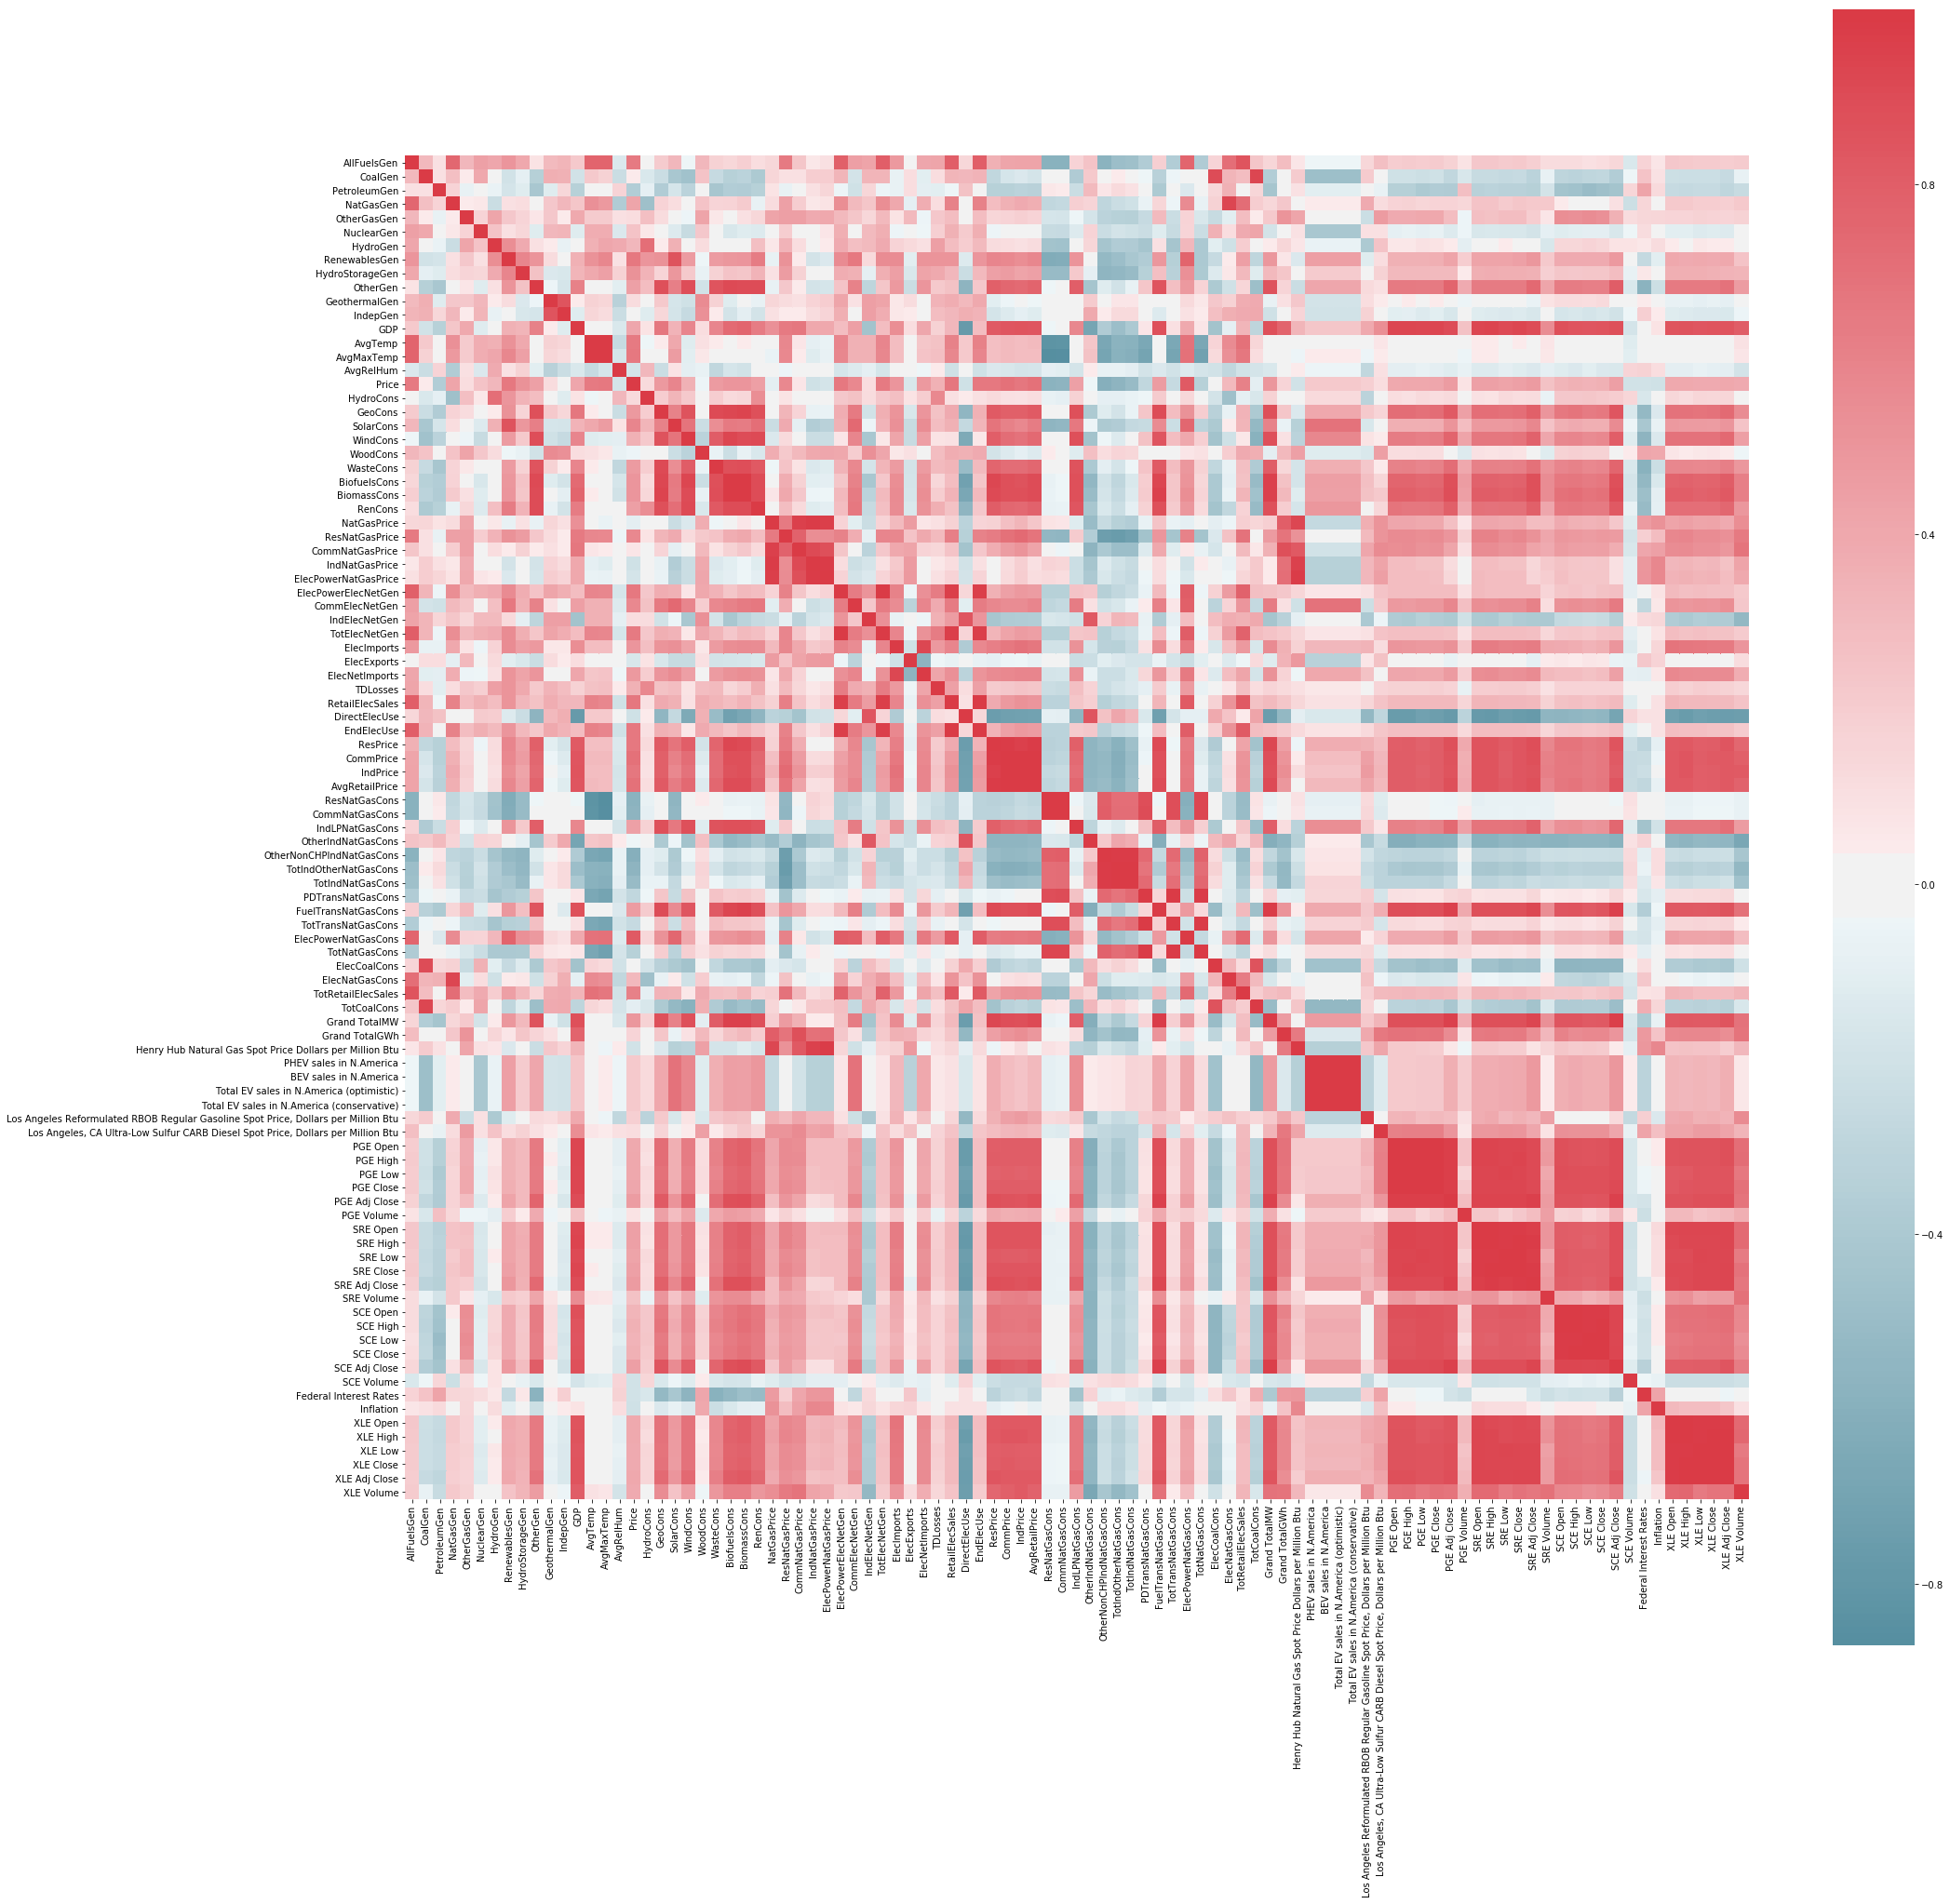

In [10]:
plt.close("all")
%run helper_functions.py
reg_heat_map(std_train_data)

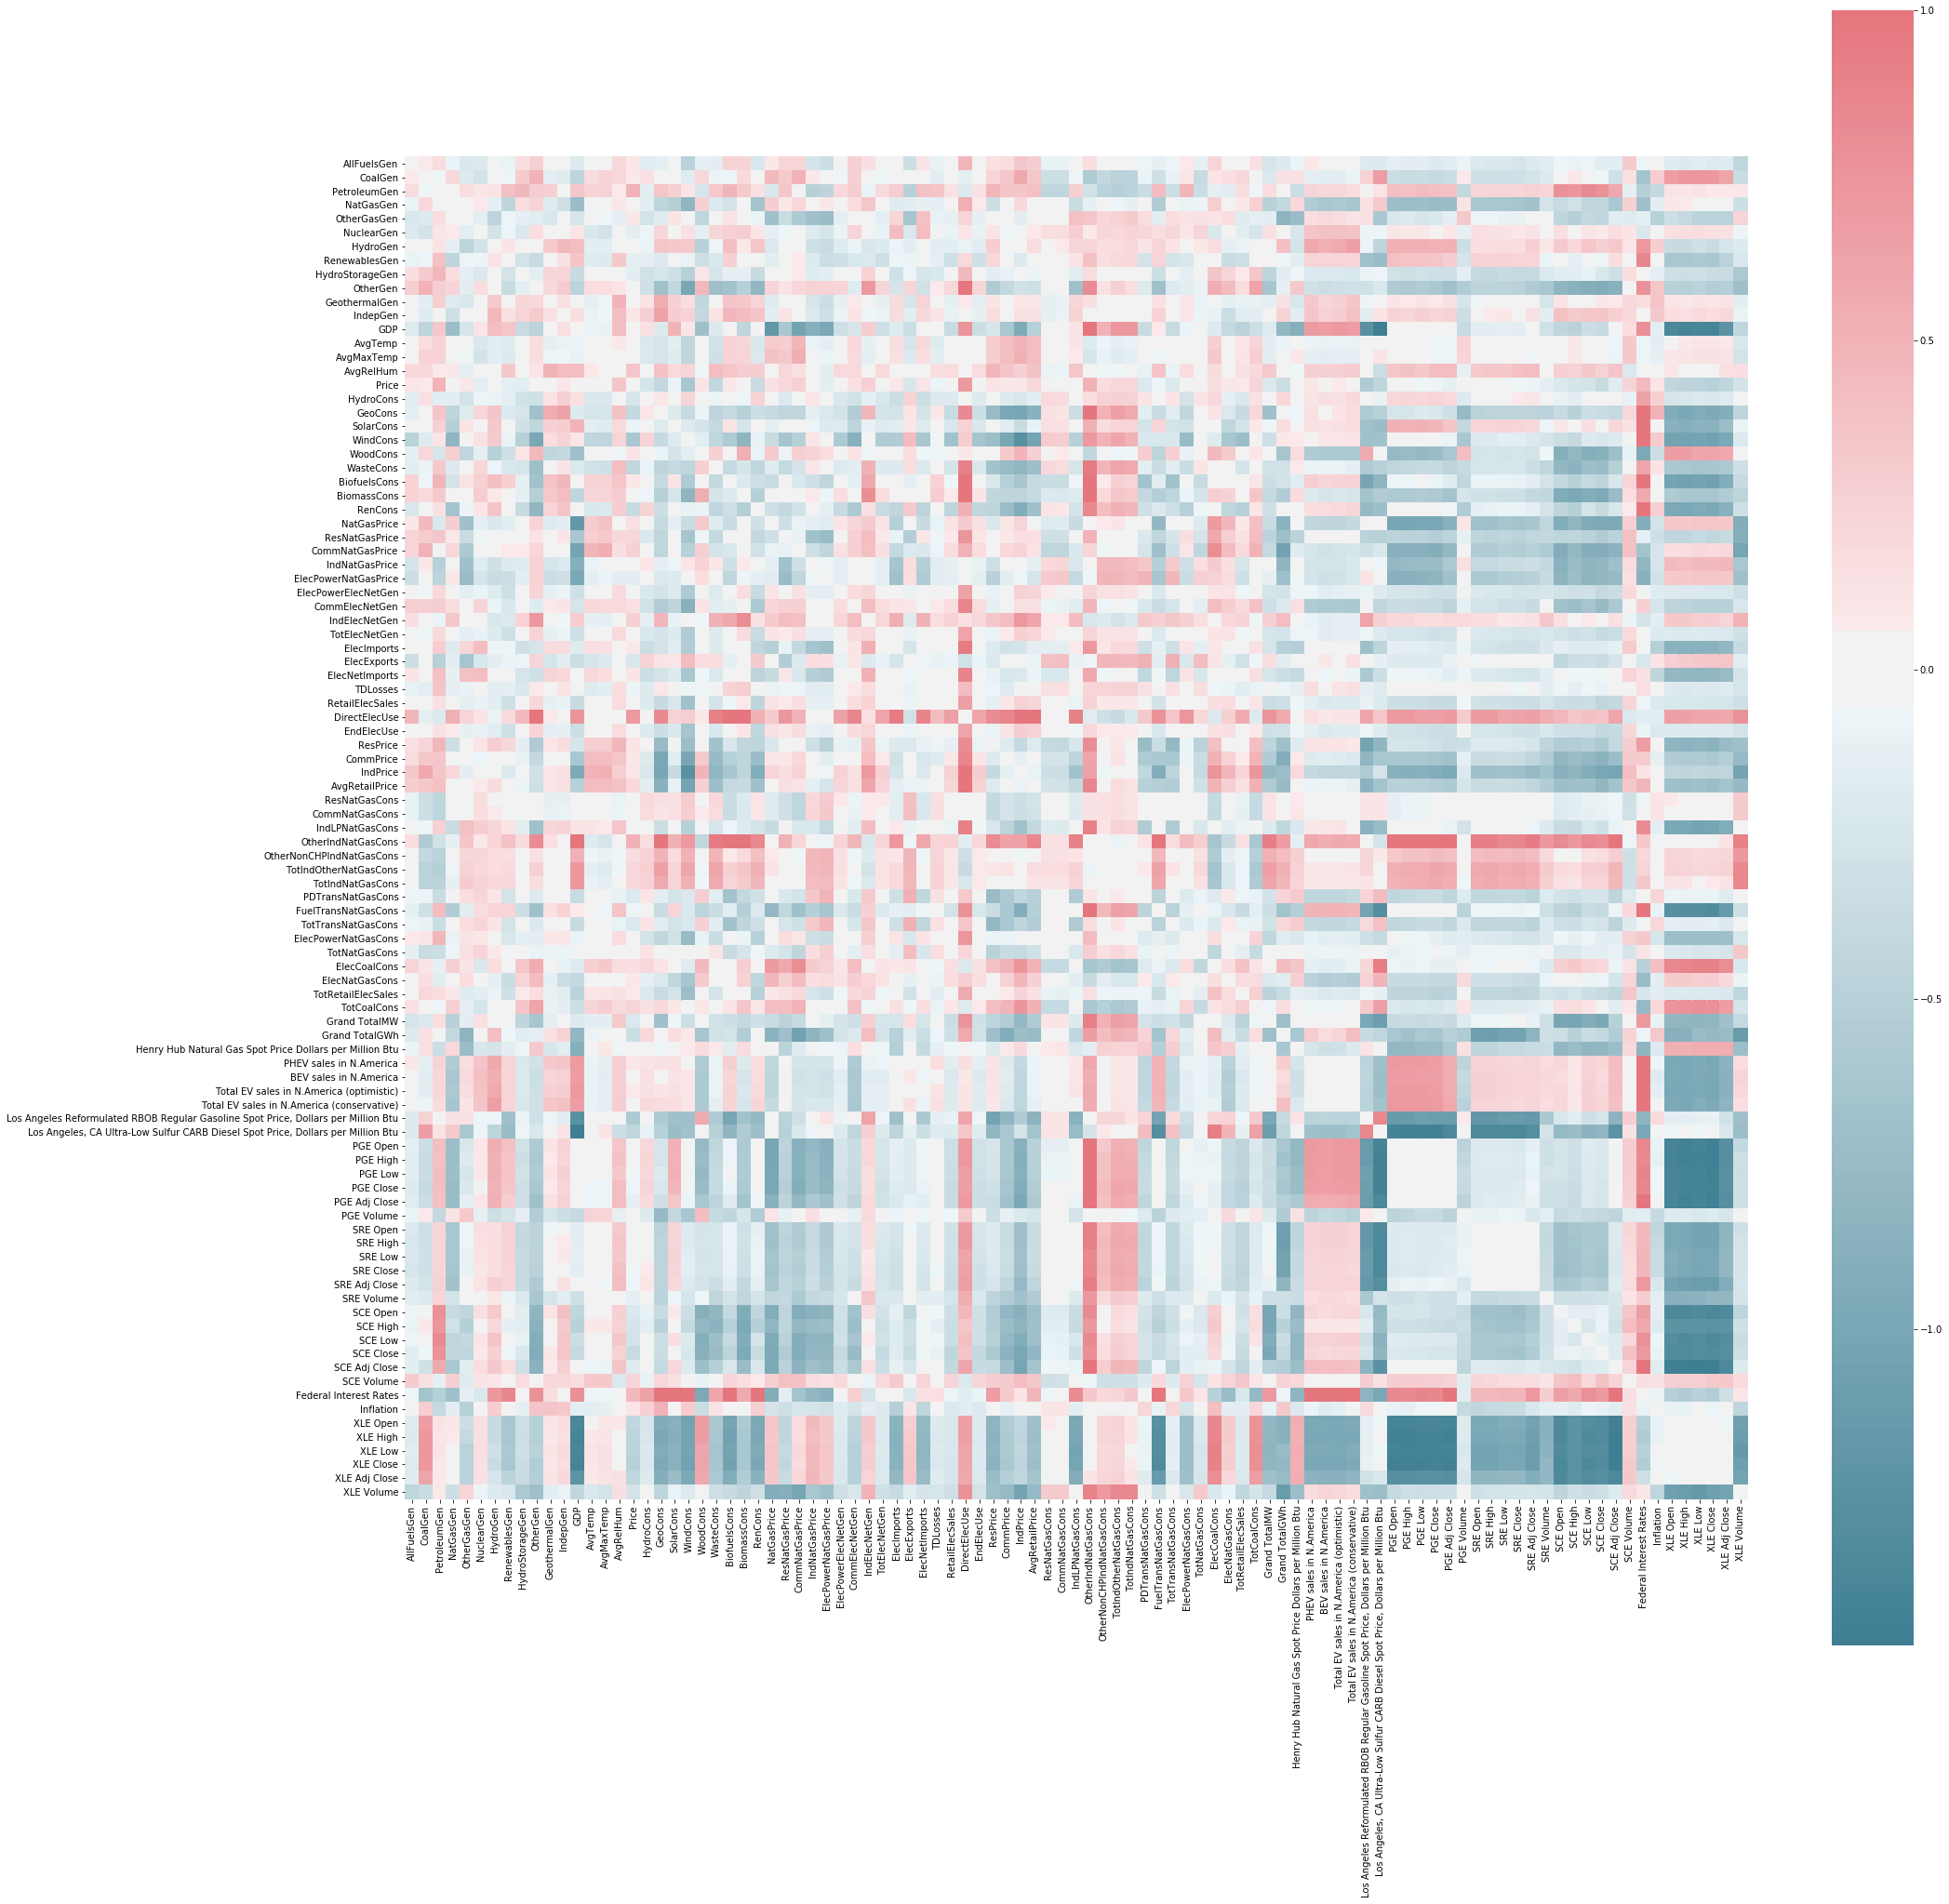

In [12]:
plt.close("all")
%run helper_functions.py
#show how correlation coefficients differ between the train and test sets. Red indicates and increase in correlation in the test set, blue  indicates a decrease
#and white indicates no change
trainVtest_heat_map(std_train_data,std_test_data)

### Time displaced correlations of all features with price

Displace (advance) feature signals by n months. This will line up past signals with future prices. Truncate n months at the end of feature signals and n months at the beginning of price signals.

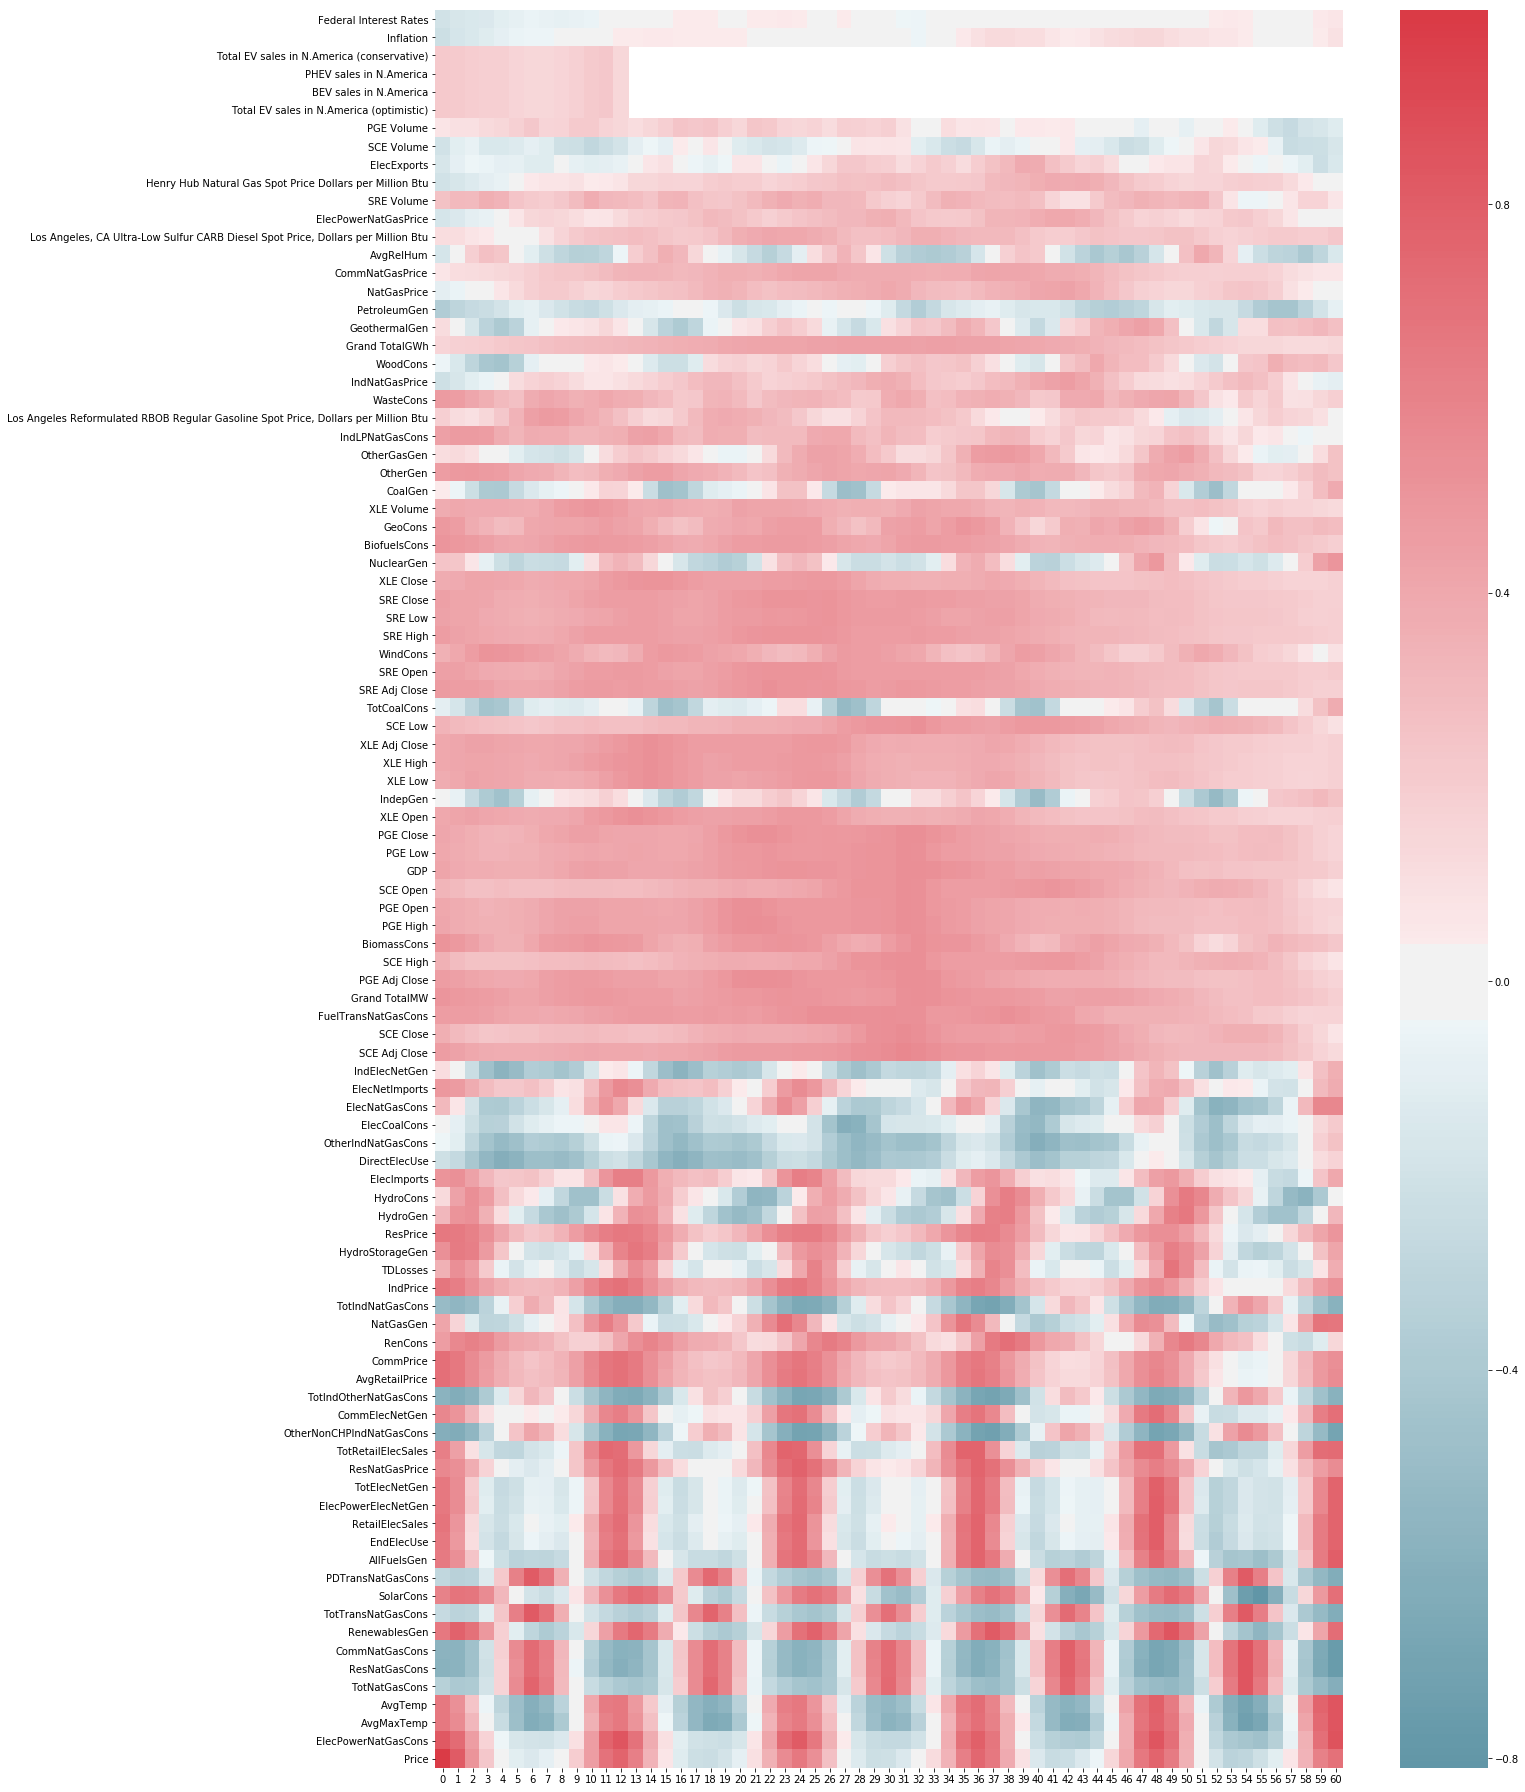

In [13]:
plt.close("all")
%run helper_functions.py 
time_heat_map(std_train_data, months=60)

## Feature Construction

Create new features using derivatives (perhaps first interpolating with polynomials, then taking the derivative(s) of these instead of using finite difference), powers, time offsets, and perhaps products and quotients of these. Do this intelligently so as not to create an intractable amount of combinations.

In [14]:
%run helper_functions.py 
new_train_data0 = keep_distinct_features(std_train_data, corr_cut=0.95, look_back=7)

37 features thrown out due to correlation with other features. 0 NaNs resulted from Pearson calculations
59 total features remaining


In [15]:
new_train_data0.shape

(139, 60)

In [16]:
%run helper_functions.py 
new_train_data1 = new_features_with_funcs(new_train_data0,\
                                   [cumtrapz_ext, diff_ext, np.log, np.sqrt, np.square, np.exp],\
                                   ['Int', 'Diff', 'Log', 'Sqrt', 'Square', 'Exp'],\
                                   filter=True,\
                                   corr_cut=0.6,\
                                   look_back=7)

57 net new features created with functions. 303 new features were thrown out due to poor correlation with price at all month offsets from 0 to 7
116 total features remaining


In [17]:
%run helper_functions.py 
new_train_data2 = new_features_with_combs(new_train_data1, combiners=['*','/'], filter=True, corr_cut=0.9, look_back=7)

337 net new features created with combinations. 33593 new features were thrown out due to poor correlation with Price
453 total features remaining


In [18]:
%run helper_functions.py
new_train_data3 = keep_distinct_features(new_train_data2, corr_cut=0.9, look_back=7)

402 features thrown out due to correlation with other features. 0 NaNs resulted from Pearson calculations
51 total features remaining


In [19]:
new_train_data3.shape

(139, 52)

In [20]:
#%run helper_functions.py 
new_train_data4 = trim_features(new_train_data3, corr_cut=.4, look_back=48)

9 features thrown out due to poor correlation with price at all month offsets from 0 to 48
42 total features remaining


In [21]:
new_train_data4.head()

NatGasGen  OtherGasGen  NuclearGen  HydroGen  HydroStorageGen  \
0   3.224755     2.414644    3.216791  2.318712         2.771149   
1   2.942346     2.464350    3.099467  2.199635         2.151237   
2   3.071297     2.479367    3.286054  2.388021         2.243294   
3   3.014596     2.352832    3.168863  2.519637         2.283155   
4   3.119300     2.536523    2.660321  2.896107         3.092533   

   GeothermalGen  IndepGen  AvgRelHum     Price  HydroCons  \
0       3.402658  4.000000   2.903597  2.000000   2.574371   
1       2.111138  2.814309   3.620144  2.284830   2.407607   
2       3.084985  3.708269   3.838129  2.365325   2.770860   
3       2.253947  2.945328   3.671583  2.362229   2.472908   
4       2.199242  2.895017   3.663669  2.343653   2.613458   

            ...            RenConsLog  ElecPowerElecNetGenSqrt  \
0           ...              0.806924                 1.656725   
1           ...              0.713285                 1.439433   
2           ...              0.825761                 1.519073   
3           ...              0.758461                 1.414214   
4           ...              0.780985                 1.521251   

   DirectElecUseSquare  OtherNonCHPIndNatGasConsSquare  TotTransNatGasConsLog  \
0            13.709653                       15.544822               1.304419   
1             9.267445                       13.033473               1.175157   
2            11.741236                       14.154608               1.148704   
3             9.858489                       11.650818               0.961485   
4            10.082030                        8.643042               0.816790   

   PriceExp/AvgTempLog  PriceExp/CommNatGasPrice  PriceSquare/WoodCons  \
0             9.602048                  2.748870              1.260215   
1            13.922250                  3.569595              2.249812   
2            12.174847                  4.077766              1.970271   
3            12.605284                  4.108872              2.096460   
4             9.396200                  3.974083              2.150119   

   RenewablesGenSqrt*PriceSqrt  SCE Volume*PriceSquare  
0                     2.128989               11.042090  
1                     2.137676               11.838064  
2                     2.360192               12.401047  
3                     2.364388               12.277898  
4                     2.376451               12.060047  

[5 rows x 43 columns]

In [22]:
# %run helper_functions.py 
new_train_data5 = new_features_with_funcs(new_train_data3,\
                                    [cumtrapz_ext, diff_ext, np.log, np.sqrt, np.square, np.exp],\
                                    ['Int', 'Diff', 'Log', 'Sqrt', 'Square', 'Exp'],\
                                    filter=True,\
                                    corr_cut=0.7,\
                                    look_back=24)

54 net new features created with functions. 258 new features were thrown out due to poor correlation with price at all month offsets from 0 to 24
105 total features remaining


In [23]:
new_train_data5.shape

(139, 106)

In [24]:
#%run helper_functions.py 
#new_test_data6 = new_features_with_combs(new_test_data5, combiners=['*','/'], filter=True, corr_cut=0.7, look_back=3)

In [25]:
# %run helper_functions.py 
new_train_data7 = keep_distinct_features(new_train_data5, corr_cut=.95, look_back=12)

52 features thrown out due to correlation with other features. 0 NaNs resulted from Pearson calculations
53 total features remaining


In [26]:
new_train_data7.shape

(139, 54)

In [27]:
#%run helper_functions.py 
new_train_data8 = trim_features(new_train_data7
, corr_cut=.2, look_back=48)

1 features thrown out due to poor correlation with price at all month offsets from 0 to 48
52 total features remaining


In [28]:
new_train_data8.shape

(139, 53)

In [29]:
new_train_data = new_train_data8
new_train_data.shape

(139, 53)

In [30]:
list(new_train_data)

['PetroleumGen',
 'OtherGasGen',
 'NuclearGen',
 'HydroGen',
 'HydroStorageGen',
 'GeothermalGen',
 'IndepGen',
 'AvgRelHum',
 'Price',
 'HydroCons',
 'WoodCons',
 'WasteCons',
 'CommNatGasPrice',
 'IndElecNetGen',
 'ElecImports',
 'ElecExports',
 'TDLosses',
 'IndLPNatGasCons',
 'OtherIndNatGasCons',
 'FuelTransNatGasCons',
 'TotCoalCons',
 'Grand TotalGWh',
 'Henry Hub Natural Gas Spot Price Dollars per Million Btu',
 'Los Angeles Reformulated RBOB Regular Gasoline Spot Price, Dollars per Million Btu',
 'Los Angeles, CA Ultra-Low Sulfur CARB Diesel Spot Price, Dollars per Million Btu',
 'PGE Volume',
 'SRE Volume',
 'SCE Close',
 'SCE Volume',
 'Federal Interest Rates',
 'Inflation',
 'XLE Adj Close',
 'XLE Volume',
 'AllFuelsGenLog',
 'AvgTempExp',
 'SolarConsDiff',
 'RenConsLog',
 'DirectElecUseSquare',
 'OtherNonCHPIndNatGasConsSquare',
 'TotTransNatGasConsLog',
 'PriceExp/AvgTempLog',
 'PriceSquare/WoodCons',
 'NatGasGenSquare',
 'PriceSqrt',
 'ResNatGasPriceSquare',
 'CommElecNe

In [31]:
len(list(new_train_data))

53

In [35]:
new_train_data.to_csv('EPPdf3.csv', sep=',')

## New Correlation Matrices

Pearson correlation matrix "heat map" for colinearity between all features (old and new).

Time displaced correlation matrix "heat map" for colinearity between all features (old and new) and electricity price at offset times.

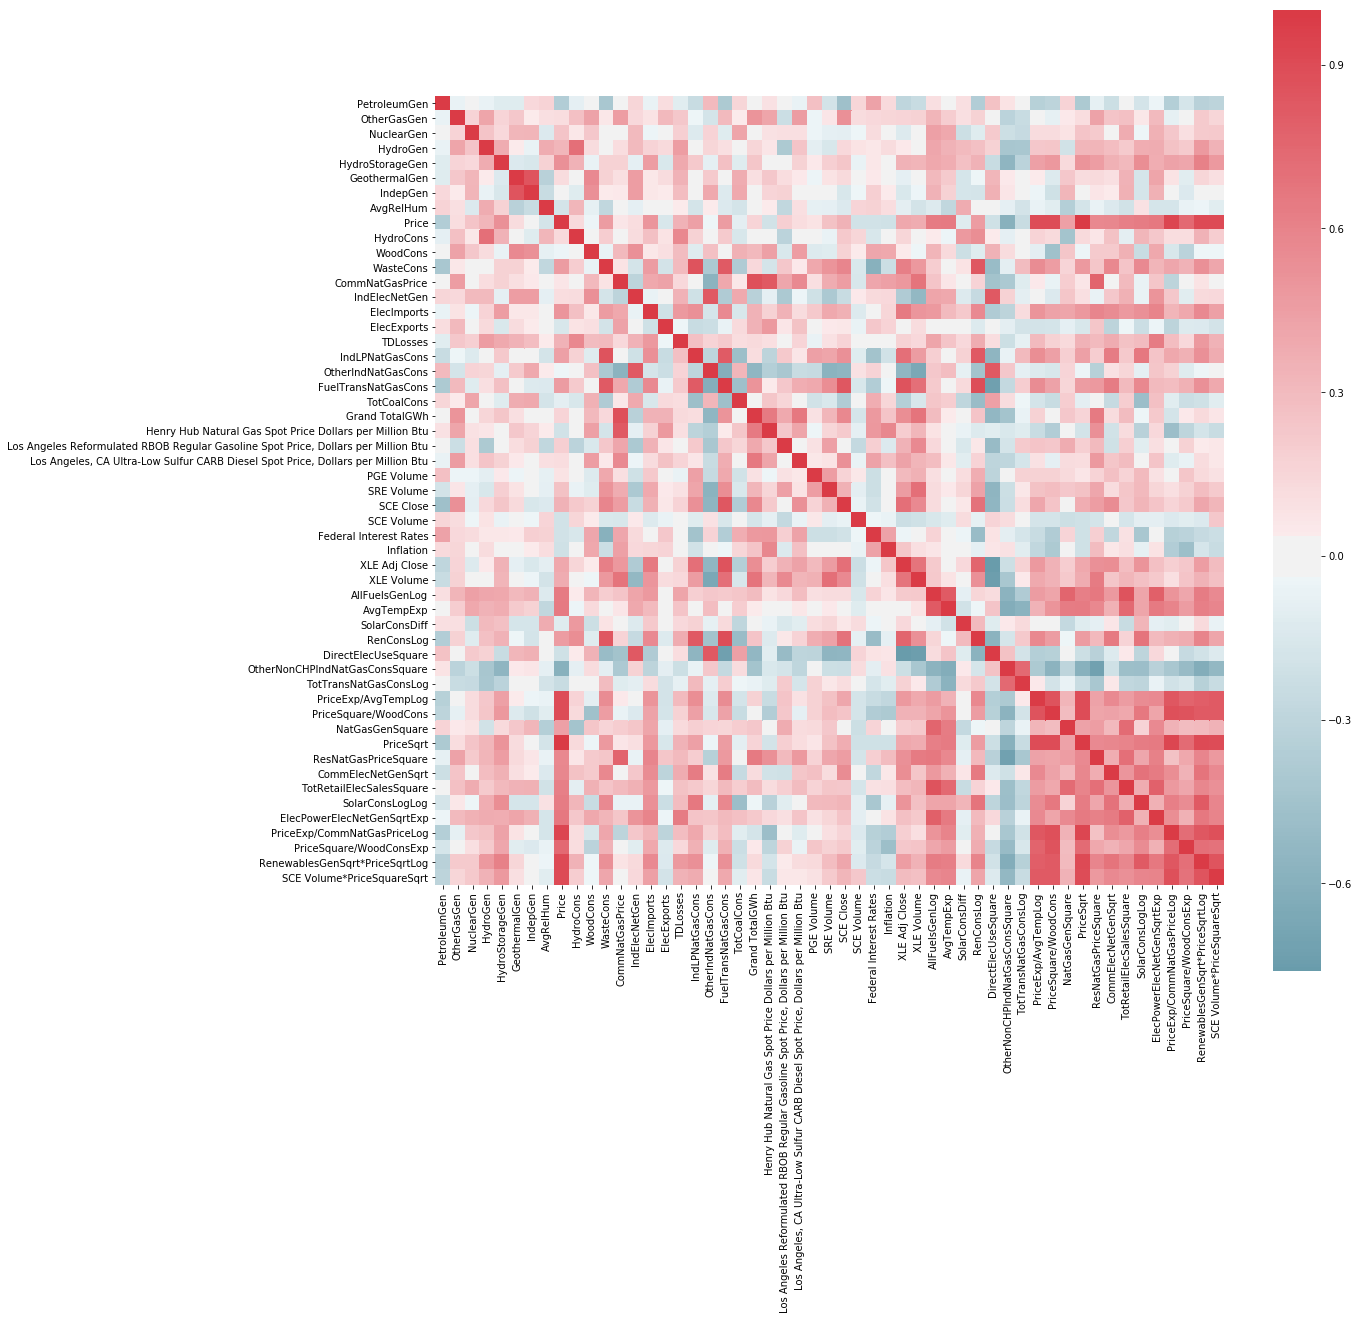

In [36]:
plt.close("all")
%run helper_functions.py 
reg_heatmap = reg_heat_map(new_train_data)
reg_heatmap

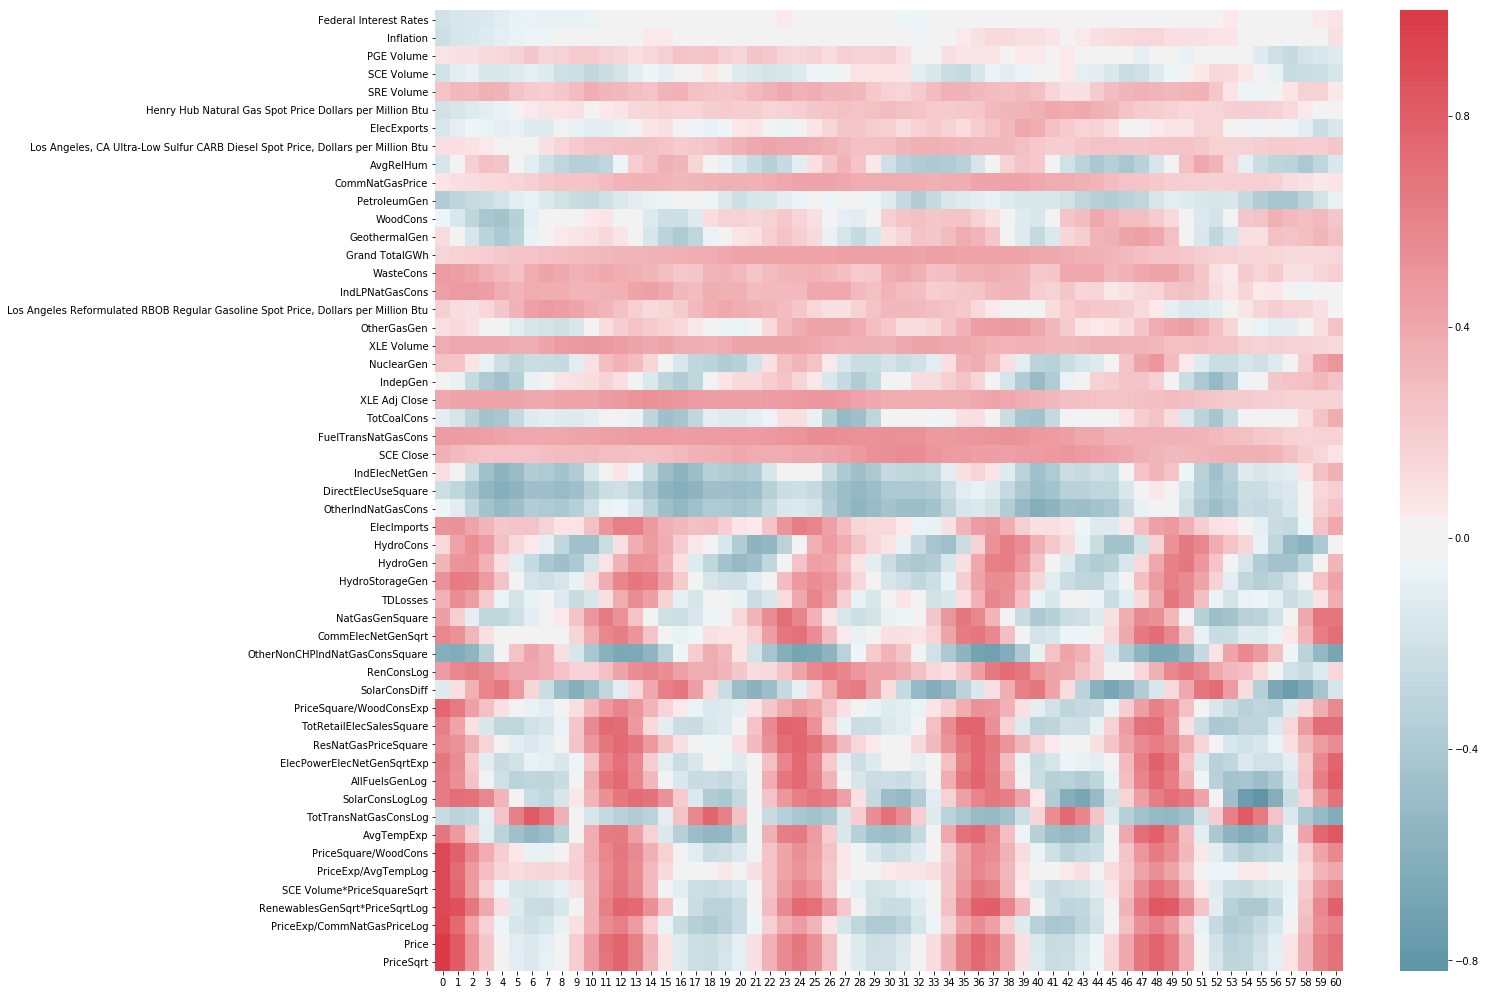

In [37]:
plt.close("all")
%run helper_functions.py 
time_heatmap = time_heat_map(new_train_data,months=60)
time_heatmap

### save data to csv for future use without processing. Upload data as needed

In [39]:
new_train_data.index

RangeIndex(start=0, stop=139, step=1)

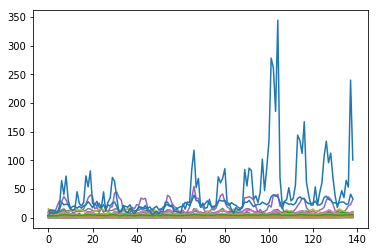

In [40]:
plt.close("all")
%run helper_functions.py 
plt.plot(new_train_data.index,new_train_data)
plt.show()

In [41]:
new_train_data.shape

(139, 53)

In [42]:
%run helper_functions.py 
sample_train_slid_df = slide_df(flip_df(new_train_data), 1, 60, purpose='train')
print(sample_train_slid_df.shape)
sample_train_slid_df

(79, 3181)


Price  PetroleumGen-1  OtherGasGen-1  NuclearGen-1  HydroGen-1  \
0   3.718266        2.094382       2.745940      2.214087    2.898052   
1   3.845201        2.046999       2.802282      2.000000    3.065320   
2   3.287926        2.119412       2.826145      2.283014    2.603235   
3   3.133127        2.042560       2.985856      2.665830    2.280357   
4   3.114551        2.075704       2.872708      2.522085    2.126413   
5   3.160991        2.034293       3.041034      3.466654    2.217305   
6   3.247678        2.002832       2.995169      3.955338    2.392660   
7   3.027864        2.003751       3.104709      3.910927    2.465287   
8   3.179567        2.003445       2.808218      3.981596    2.591272   
9   3.402477        2.042407       3.164309      3.670277    2.974079   
10  3.628483        2.021203       3.072697      3.924524    3.290743   
11  3.708978        2.017759       2.971073      3.991247    3.669067   
12  3.835913        2.002449       2.869682      3.770518    3.663400   
13  3.625387        2.002603       2.653629      3.325097    3.719492   
14  3.216718        2.000000       2.826844      3.887850    3.516754   
15  3.046440        2.009032       3.143589      3.875823    3.235742   
16  2.990712        2.004976       2.419999      3.307912    2.634777   
17  3.083591        2.004133       2.721262      3.332919    2.986713   
18  3.142415        2.025107       2.922298      3.306724    2.984602   
19  3.071207        2.008956       2.718002      2.917218    2.509264   
20  3.139319        2.031078       2.573308      2.801379    2.471271   
21  3.356037        2.013625       2.902741      3.886146    2.736505   
22  3.736842        2.002985       3.485478      4.000000    3.084382   
23  3.724458        2.010716       3.215296      3.997069    3.344605   
24  3.758514        2.036895       2.916128      3.911825    3.449635   
25  3.609907        2.002756       3.059892      3.978689    3.253269   
26  3.222910        2.004822       2.852337      3.310264    2.711872   
27  2.953560        2.009032       2.831966      3.027532    2.496638   
28  3.074303        2.013319       2.694022      3.089949    2.262021   
29  2.965944        2.008803       2.901694      3.219893    2.214468   
..       ...             ...            ...           ...         ...   
49  3.535604        2.040570       3.070601      3.585252    2.970000   
50  3.021672        2.109231       3.377685      3.260476    2.767055   
51  2.780186        2.165110       2.862464      3.325292    2.258592   
52  2.851393        2.051745       2.553635      3.193096    2.175415   
53  2.879257        2.028858       2.947093      3.527078    2.303959   
54  2.879257        2.054960       2.574705      3.236750    2.264520   
55  3.009288        2.014850       2.610675      3.570779    2.368856   
56  3.108359        2.052281       2.665735      3.351542    2.395676   
57  3.207430        2.012860       3.175717      3.895211    2.536441   
58  3.591331        2.262247       2.846866      3.786483    2.824730   
59  3.634675        2.204838       3.183866      3.961606    3.031020   
60  3.662539        2.262477       3.535301      3.639307    2.775578   
61  3.532508        2.389391       3.555672      3.276348    2.873077   
62  3.092879        2.431415       3.396310      3.842399    2.580875   
63  2.938080        2.087339       3.445318      3.992302    2.598704   
64  2.984520        2.026332       2.787963      3.736297    2.370526   
65  3.012384        2.085579       2.732321      3.964536    2.476790   
66  3.148607        2.059706       2.789128      3.372532    2.678493   
67  3.061920        2.131889       3.117863      3.218737    2.618214   
68  3.136223        2.151638       3.326698      3.641730    2.610048   
69  3.068111        2.247397       3.479891      3.896125    2.794958   
70  3.591331        2.364819       3.183633      3.978580    3.217557   
71  3.625387        2.269443       3.351959      3.975094    3.53

In [44]:
sample_train_slid_df.to_csv('EPPdf4.csv', sep=',')

In [45]:
%run helper_functions.py 
all_slid_df = slide_df(flip_df(std_all_data), 60, 60, purpose='train')
print(all_slid_df.shape)
all_slid_df

(80, 5821)


Price  AllFuelsGen-60  CoalGen-60  PetroleumGen-60  NatGasGen-60  \
0   3.995475        2.993465    2.984797         2.064741      3.258118   
1   4.000000        2.658898    3.017959         2.112728      2.930660   
2   3.527149        2.590701    2.512269         2.065802      2.829387   
3   2.997738        2.356411    2.815256         2.137518      2.841273   
4   3.511312        2.435255    3.173986         2.061406      2.981705   
5   3.490950        2.370809    3.176743         2.094231      3.079558   
6   3.450226        2.582664    3.189456         2.053218      3.080323   
7   3.395928        2.873988    3.208482         2.022060      3.252519   
8   3.420814        2.521415    2.963282         2.022970      2.758097   
9   3.237557        2.606228    3.352329         2.022667      2.780289   
10  3.803167        3.039891    3.233019         2.061254      3.189542   
11  3.909502        3.287191    3.345484         2.040255      3.151831   
12  3.859729        3.159791    3.442034         2.036843      2.772427   
13  3.703620        2.624257    3.334993         2.021681      2.148401   
14  3.409502        2.476581    3.382023         2.021833      2.044098   
15  2.895928        2.560048    3.368688         2.019256      2.157799   
16  3.273756        2.560048    3.302720         2.028201      2.341095   
17  3.316742        2.378129    3.423631         2.024183      2.659293   
18  3.364253        2.514527    3.728574         2.023349      2.681987   
19  3.289593        2.744703    3.542052         2.044121      2.963917   
20  3.429864        2.558754    3.091394         2.028125      3.086259   
21  3.563348        2.821404    3.364509         2.050034      3.455790   
22  3.957014        3.001570    3.521337         2.032750      3.184141   
23  3.918552        3.355448    3.483997         2.022212      3.358744   
24  3.945701        3.235346    3.606686         2.029869      3.016291   
25  3.676471        2.654727    3.537073         2.055796      2.265580   
26  3.368778        2.600050    3.459815         2.021985      2.349391   
27  2.889140        2.557454    3.386291         2.024032      2.813644   
28  3.246606        2.634195    2.996622         2.028201      3.134711   
29  3.264706        2.409424    3.537251         2.032446      3.008327   
..       ...             ...         ...              ...           ...   
50  3.151584        2.670092    3.165452         2.059434      2.709306   
51  2.966063        2.846702    3.535651         2.127435      3.127942   
52  2.934389        2.437974    3.194701         2.182776      2.885329   
53  2.966063        2.421422    3.216038         2.070503      3.001570   
54  2.977376        2.846251    3.709726         2.047836      3.367021   
55  2.895928        2.777275    3.649893         2.073687      3.408715   
56  2.943439        2.692024    3.456792         2.033963      3.174468   
57  3.036199        2.781976    3.494132         2.071033      3.273328   
58  3.538462        3.084105    3.691501         2.031992      3.396840   
59  3.468326        3.691159    3.752934         2.278978      4.000000   
60  3.255656        3.604355    3.658161         2.222121      3.712593   
61  3.348416        2.941381    3.693012         2.279206      3.062842   
62  2.941176        2.622169    3.383179         2.404897      2.746750   
63  2.828054        2.486481    3.562322         2.446517      2.585746   
64  2.814480        2.486773    3.159139         2.105754      2.587978   
65  2.848416        2.392609    3.603752         2.045334      2.706345   
66  2.911765        2.666778    3.790807         2.104010      2.865694   
67  2.751131        2.715863    3.625889         2.078387      3.057828   
68  2.861991        2.552641    3.767514         2.149875      2.920630   
69  3.024887        2.814812    3.536095         2.169434      3.106980   
70  3.190045        3.078879    3.699502         2.264271      3.265362   
71  3.248869        3.467458    

In [47]:
all_slid_df.to_csv('EPPdf5.csv', sep=',')

In [49]:
raw_data.head()

AllFuelsGen  CoalGen  PetroleumGen  NatGasGen  OtherGasGen  NuclearGen  \
0     16618.89   199.86        263.92   10192.49        97.57     2380.00   
1     14380.39   184.14        175.65    8870.58       101.84     2229.87   
2     15848.63   102.50        119.55    9474.18       103.13     2468.63   
3     15841.02   205.59         90.02    9208.77        92.26     2318.67   
4     16874.50   200.48        103.19    9698.87       108.04     1667.93   

   HydroGen  RenewablesGen  HydroStorageGen  OtherGen     ...      \
0   1590.10        1717.40           -36.26     18.03     ...       
1   1290.01        1504.66          -172.96     17.30     ...       
2   1764.77        1788.32          -152.66     16.49     ...       
3   2096.46        1797.49          -143.87     13.42     ...       
4   3045.22        1831.97            34.61     16.19     ...       

   SCE Adj Close  SCE Volume  Federal Interest Rates  Inflation   XLE Open  \
0       4.437073    136100.0                    5.98     0.0373  33.750000   
1       4.580492     51200.0                    5.49     0.0353  32.130001   
2       4.078519     42400.0                    5.31     0.0292  31.850000   
3       3.226961     39600.0                    4.80     0.0327  30.500000   
4       3.137323     38800.0                    4.21     0.0362  33.580002   

    XLE High    XLE Low  XLE Close  XLE Adj Close  XLE Volume  
0  34.109379  30.187500  32.130001      23.161621     4092000  
1  34.040001  31.549999  31.740000      22.880482     4613800  
2  34.349998  29.450001  30.700001      22.130783     6845600  
3  34.240002  29.049999  33.869999      24.489994     4746100  
4  34.900002  31.809999  33.549999      24.258610     9348600  

[5 rows x 97 columns]

## RFE and PCA, select from Dataset

In [51]:
from sklearn.preprocessing import MinMaxScaler    #scales all values to a range of 0 to 1 for better performance

#mms = MinMaxScaler()  #note, turn to 2-4 range
augmented_data = new_train_data     #only 4 features
#augmented_data = sample_test_slid_df   #17 features
#augmented_data = raw_data  #62 features
#augmented_data = result = pd.concat([new_test_data.drop(('Price'), axis=1), raw_data], axis=1)  #66 features
#augmented_data = result = pd.concat([sample_slid_df, raw_data], axis=1)  #79 features


#df_mms = pd.DataFrame(mms.fit_transform(augmented_data.dropna()))
#df_mms.columns = augmented_data.columns
#df_mms.plot(figsize=(20, 10)); # Plotting Individual Columns
#plt.show()
augmented_data.shape

(139, 53)

In [52]:
#run train test split
%run helper_functions.py 
x_train, x_test, y_train, y_test = tt_split(augmented_data,test_months=0,split_type="sequence",comp_var='Price')

Number of samples in training data: 139
Number of samples in validation data: 0
(139, 52) (139,)
(0, 52) (0,)


In [53]:

#Xvec = pd.concat([red_x_train,red_x_test])
#Xvec

In [54]:
x_test.head()

Empty DataFrame
Columns: [PetroleumGen, OtherGasGen, NuclearGen, HydroGen, HydroStorageGen, GeothermalGen, IndepGen, AvgRelHum, HydroCons, WoodCons, WasteCons, CommNatGasPrice, IndElecNetGen, ElecImports, ElecExports, TDLosses, IndLPNatGasCons, OtherIndNatGasCons, FuelTransNatGasCons, TotCoalCons, Grand TotalGWh, Henry Hub Natural Gas Spot Price Dollars per Million Btu, Los Angeles Reformulated RBOB Regular Gasoline Spot Price, Dollars per Million Btu, Los Angeles, CA Ultra-Low Sulfur CARB Diesel Spot Price, Dollars per Million Btu, PGE Volume, SRE Volume, SCE Close, SCE Volume, Federal Interest Rates, Inflation, XLE Adj Close, XLE Volume, AllFuelsGenLog, AvgTempExp, SolarConsDiff, RenConsLog, DirectElecUseSquare, OtherNonCHPIndNatGasConsSquare, TotTransNatGasConsLog, PriceExp/AvgTempLog, PriceSquare/WoodCons, NatGasGenSquare, PriceSqrt, ResNatGasPriceSquare, CommElecNetGenSqrt, TotRetailElecSalesSquare, SolarConsLogLog, ElecPowerElecNetGenSqrtExp, PriceExp/CommNatGasPriceLog, PriceSquare/WoodConsExp, RenewablesGenSqrt*PriceSqrtLog, SCE Volume*PriceSquareSqrt]
Index: []

[0 rows x 52 columns]

In [55]:
#run RFE with selected number of features to keep. Use this box to make computation time shorter as needed.
%run helper_functions.py 
ranks, red_x_train, red_x_test = RFE_elim(x_train,y_train,x_test,n_keep=10)

[ True False False False False False False  True False  True False False
  True False False False False False False False False False False False
 False False False  True False False False False False False False False
 False  True False False  True False  True False False False False False
  True False False  True]
[ 1 34 37  4  7 19 10  1  8  1 22 32  1 38 15  9 28 13 25 14 18 36 26 27  3
 16 41  1 40 24  6 11 30 17  5 35 29  1 21  2  1 12  1 39 31 33 42 20  1 43
 23  1]
['PetroleumGen', 'HydroGen', 'AvgRelHum', 'WoodCons', 'IndElecNetGen', 'PGE Volume', 'SCE Volume', 'OtherNonCHPIndNatGasConsSquare', 'PriceExp/AvgTempLog', 'PriceSquare/WoodCons', 'PriceSqrt', 'PriceExp/CommNatGasPriceLog', 'SCE Volume*PriceSquareSqrt']


In [56]:
#Fixing train test split formatting

X_df = pd.concat([red_x_train,red_x_test])
Y_df = pd.concat([y_train,y_test])
RFE_df = X_df
RFE_df['Price'] = Y_df
RFE_df.to_csv('EPPdf7_10.csv', sep=',')

In [57]:
#run RFE with selected number of features to keep. Use this box to make computation time shorter as needed.
%run helper_functions.py 
ranks, red_x_train, red_x_test = RFE_elim(x_train,y_train,x_test,n_keep=25)

[ True False False  True  True False  True  True  True  True False False
  True False  True  True False  True False  True False False False False
  True  True False  True False False  True  True False False  True False
 False  True False  True  True  True  True False False False False False
  True False False  True]
[ 1 19 22  1  1  4  1  1  1  1  7 17  1 23  1  1 13  1 10  1  3 21 11 12  1
  1 26  1 25  9  1  1 15  2  1 20 14  1  6  1  1  1  1 24 16 18 27  5  1 28
  8  1]
['PetroleumGen', 'HydroGen', 'HydroStorageGen', 'GeothermalGen', 'IndepGen', 'AvgRelHum', 'HydroCons', 'WoodCons', 'IndElecNetGen', 'ElecExports', 'TDLosses', 'OtherIndNatGasCons', 'TotCoalCons', 'Grand TotalGWh', 'PGE Volume', 'SRE Volume', 'SCE Volume', 'XLE Adj Close', 'XLE Volume', 'AvgTempExp', 'SolarConsDiff', 'OtherNonCHPIndNatGasConsSquare', 'PriceExp/AvgTempLog', 'PriceSquare/WoodCons', 'NatGasGenSquare', 'PriceSqrt', 'PriceExp/CommNatGasPriceLog', 'SCE Volume*PriceSquareSqrt']


In [58]:
#Fixing train test split formatting

X_df = pd.concat([red_x_train,red_x_test])
Y_df = pd.concat([y_train,y_test])
RFE_df = X_df
RFE_df['Price'] = Y_df
RFE_df.to_csv('EPPdf7_25.csv', sep=',')

In [59]:
#run RFE with selected number of features to keep. Use this box to make computation time shorter as needed.
%run helper_functions.py 
ranks, red_x_train, red_x_test = RFE_elim(x_train,y_train,x_test,n_keep=40)

[ True False False  True  True  True  True  True  True  True  True False
  True False  True  True  True  True  True  True  True False  True  True
  True  True False  True False  True  True  True  True  True  True False
  True  True  True  True  True  True  True False  True False False  True
  True False  True  True]
[ 1  4  7  1  1  1  1  1  1  1  1  2  1  8  1  1  1  1  1  1  1  6  1  1  1
  1 11  1 10  1  1  1  1  1  1  5  1  1  1  1  1  1  1  9  1  3 12  1  1 13
  1  1]
['PetroleumGen', 'OtherGasGen', 'HydroGen', 'HydroStorageGen', 'GeothermalGen', 'IndepGen', 'AvgRelHum', 'HydroCons', 'WoodCons', 'WasteCons', 'CommNatGasPrice', 'IndElecNetGen', 'ElecExports', 'TDLosses', 'IndLPNatGasCons', 'OtherIndNatGasCons', 'FuelTransNatGasCons', 'TotCoalCons', 'Grand TotalGWh', 'Los Angeles Reformulated RBOB Regular Gasoline Spot Price, Dollars per Million Btu', 'Los Angeles, CA Ultra-Low Sulfur CARB Diesel Spot Price, Dollars per Million Btu', 'PGE Volume', 'SRE Volume', 'SCE Volume', 'Inflat

In [60]:
#Fixing train test split formatting

X_df = pd.concat([red_x_train,red_x_test])
Y_df = pd.concat([y_train,y_test])
RFE_df = X_df
RFE_df['Price'] = Y_df
RFE_df.to_csv('EPPdf7_40.csv', sep=',')

In [61]:
#X_df = pd.concat([new_test_data.drop(('Price'), axis=1), X_df], axis=1).dropna()
#red_x_test = pd.concat([new_test_data.drop(('Price'), axis=1), red_x_test], axis=1).dropna()

In [62]:
#save output to dataframe

X_df['Price']

0      2.000000
1      2.284830
2      2.365325
3      2.362229
4      2.343653
5      2.814241
6      3.473684
7      3.365325
8      3.368421
9      3.247678
10     2.758514
11     2.730650
12     2.808050
13     2.761610
14     2.817337
15     2.705882
16     3.052632
17     3.250774
18     3.566563
19     3.411765
20     3.092879
21     3.229102
22     3.046440
23     3.000000
24     2.869969
25     2.910217
26     2.591331
27     2.934985
28     3.065015
29     3.328173
         ...   
109    2.965944
110    3.074303
111    2.953560
112    3.222910
113    3.609907
114    3.758514
115    3.724458
116    3.736842
117    3.356037
118    3.139319
119    3.071207
120    3.142415
121    3.083591
122    2.990712
123    3.046440
124    3.216718
125    3.625387
126    3.835913
127    3.708978
128    3.628483
129    3.402477
130    3.179567
131    3.027864
132    3.247678
133    3.160991
134    3.114551
135    3.133127
136    3.287926
137    3.845201
138    3.718266
Name: Price, Length: 139

In [63]:
X_df = X_df.drop(('Price'), axis=1)

In [66]:
PCAdims

54

Explained Variance: [ 0.95453849  0.03102681]
Training Accuracy = 68.55 %
Coefficients: [ 0.0052576   0.01311678]
Train RMSE: 0.21284539633738603


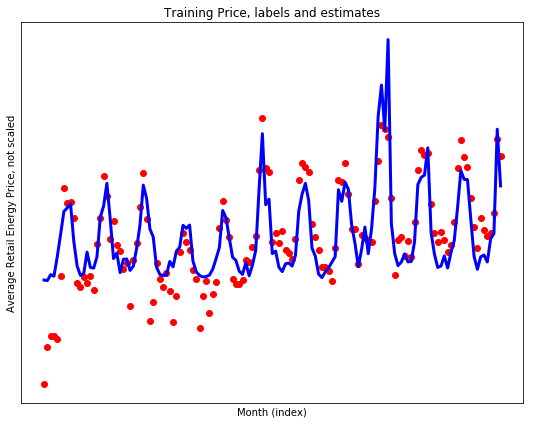

Explained Variance: [ 0.95453849  0.03102681  0.00666465]
Training Accuracy = 92.2 %
Coefficients: [ 0.0052576   0.01311678 -0.04051925]
Train RMSE: 0.10602378239494967


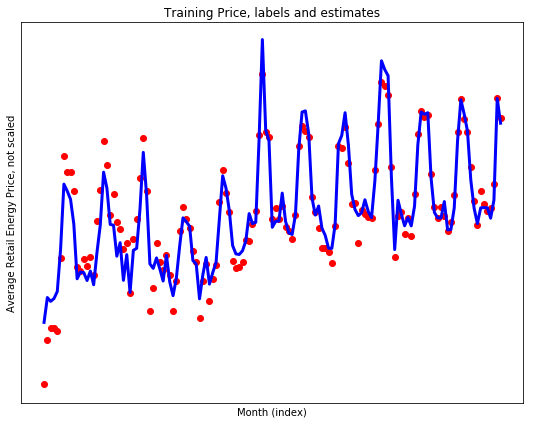

Explained Variance: [ 0.95453849  0.03102681  0.00666465  0.00348533]
Training Accuracy = 93.51 %
Coefficients: [ 0.0052576   0.01311678 -0.04051925  0.01322643]
Train RMSE: 0.09665930802923217


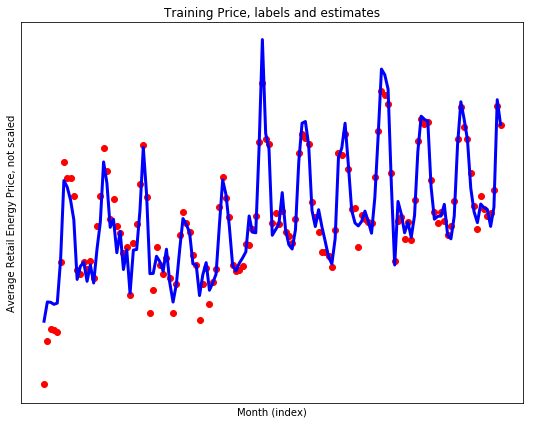

Explained Variance: [ 0.95453849  0.03102681  0.00666465  0.00348533  0.00149852]
Training Accuracy = 96.09 %
Coefficients: [ 0.0052576   0.01311678 -0.04051925  0.01322643 -0.02819694]
Train RMSE: 0.07506111101589516


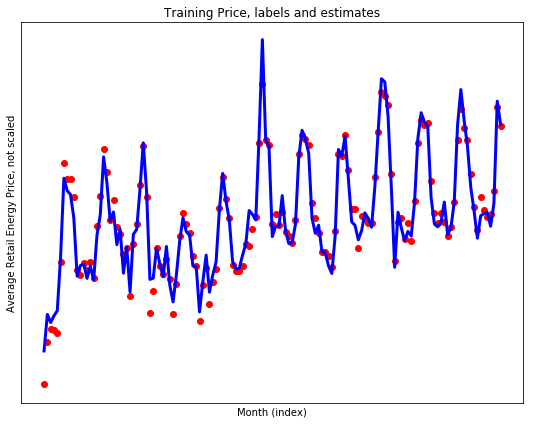

Explained Variance: [ 0.95453849  0.03102681  0.00666465  0.00348533  0.00149852  0.00097676]
Training Accuracy = 96.39 %
Coefficients: [ 0.0052576   0.01311678 -0.04051925  0.01322643 -0.02819694 -0.01187492]
Train RMSE: 0.07214849513188847


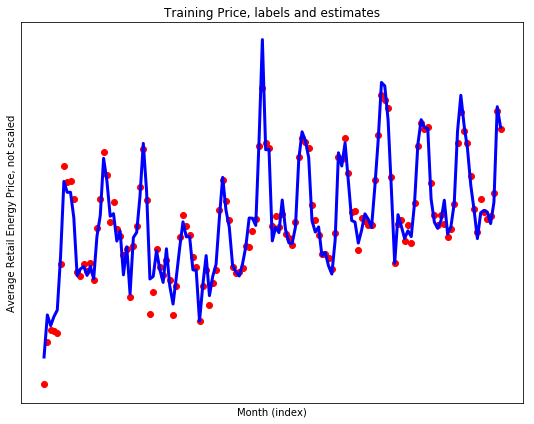

Explained Variance: [  9.54538494e-01   3.10268058e-02   6.66464813e-03   3.48533127e-03
   1.49852403e-03   9.76755603e-04   5.69215483e-04]
Training Accuracy = 96.39 %
Coefficients: [ 0.0052576   0.01311678 -0.04051925  0.01322643 -0.02819694 -0.01187492
  0.00096032]
Train RMSE: 0.07213716963261677


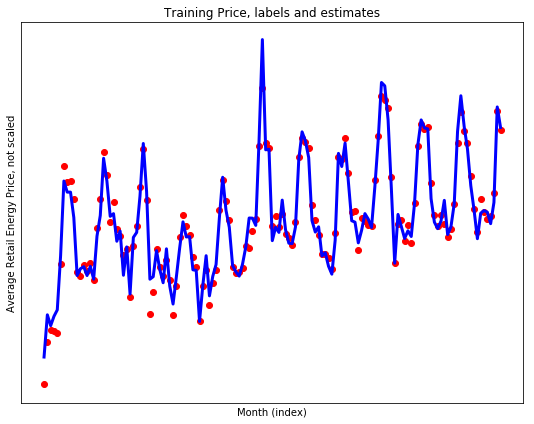

Explained Variance: [  9.54538494e-01   3.10268058e-02   6.66464813e-03   3.48533127e-03
   1.49852403e-03   9.76755603e-04   5.69215483e-04   2.90278915e-04]
Training Accuracy = 96.48 %
Coefficients: [ 0.0052576   0.01311678 -0.04051925  0.01322643 -0.02819694 -0.01187492
  0.00096032 -0.01189022]
Train RMSE: 0.07124618833485143


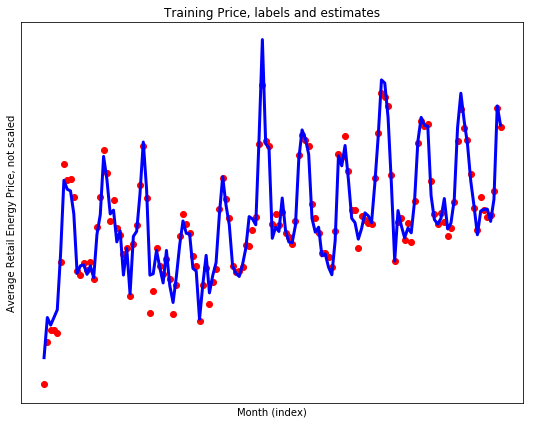

Explained Variance: [  9.54538494e-01   3.10268058e-02   6.66464813e-03   3.48533127e-03
   1.49852403e-03   9.76755603e-04   5.69215483e-04   2.90278915e-04
   1.74317708e-04]
Training Accuracy = 96.5 %
Coefficients: [ 0.0052576   0.01311678 -0.04051925  0.01322643 -0.02819694 -0.01187492
  0.00096032 -0.01189022  0.00829869]
Train RMSE: 0.07098343835391063


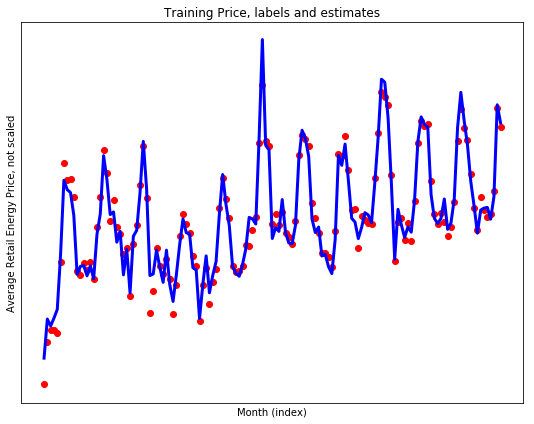

Explained Variance: [  9.54538494e-01   3.10268058e-02   6.66464813e-03   3.48533127e-03
   1.49852403e-03   9.76755603e-04   5.69215483e-04   2.90278915e-04
   1.74317708e-04   1.27294194e-04]
Training Accuracy = 96.8 %
Coefficients: [ 0.0052576   0.01311678 -0.04051925  0.01322643 -0.02819694 -0.01187492
  0.00096032 -0.01189022  0.00829869  0.03300764]
Train RMSE: 0.06787430715520876


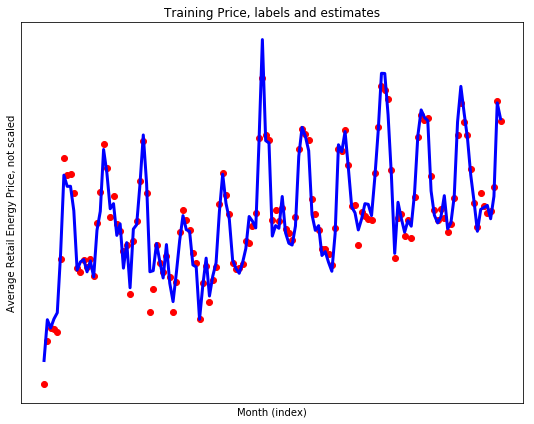

Explained Variance: [  9.54538494e-01   3.10268058e-02   6.66464813e-03   3.48533127e-03
   1.49852403e-03   9.76755603e-04   5.69215483e-04   2.90278915e-04
   1.74317708e-04   1.27294194e-04   1.18059349e-04]
Training Accuracy = 96.82 %
Coefficients: [ 0.0052576   0.01311678 -0.04051925  0.01322643 -0.02819694 -0.01187492
  0.00096032 -0.01189022  0.00829869  0.03300764 -0.00724048]
Train RMSE: 0.0677322292546989


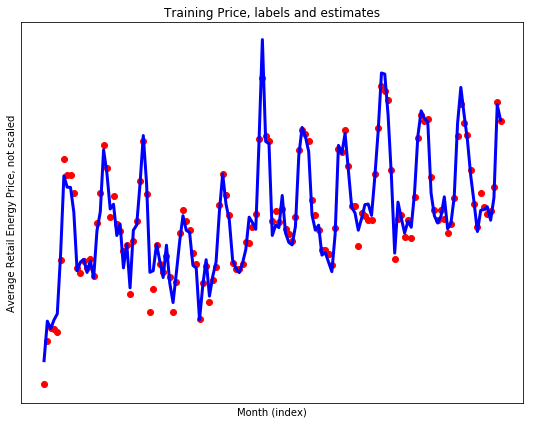

Explained Variance: [  9.54538494e-01   3.10268058e-02   6.66464813e-03   3.48533127e-03
   1.49852403e-03   9.76755603e-04   5.69215483e-04   2.90278915e-04
   1.74317708e-04   1.27294194e-04   1.18059349e-04   9.92382243e-05]
Training Accuracy = 96.84 %
Coefficients: [ 0.0052576   0.01311678 -0.04051925  0.01322643 -0.02819694 -0.01187492
  0.00096032 -0.01189022  0.00829869  0.03300764 -0.00724048 -0.00970534]
Train RMSE: 0.06751708125363022


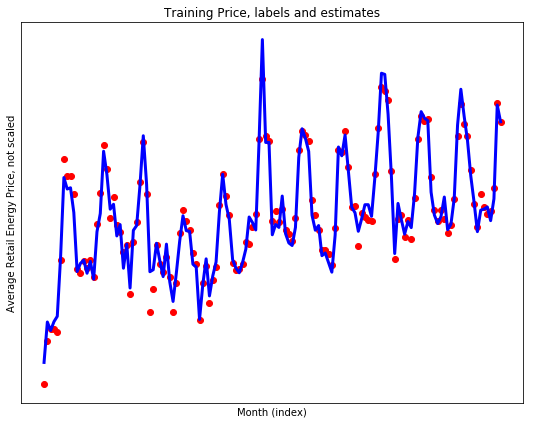

Explained Variance: [  9.54538494e-01   3.10268058e-02   6.66464813e-03   3.48533127e-03
   1.49852403e-03   9.76755603e-04   5.69215483e-04   2.90278915e-04
   1.74317708e-04   1.27294194e-04   1.18059349e-04   9.92382243e-05
   4.76342124e-05]
Training Accuracy = 96.96 %
Coefficients: [ 0.0052576   0.01311678 -0.04051925  0.01322643 -0.02819694 -0.01187492
  0.00096032 -0.01189022  0.00829869  0.03300764 -0.00724048 -0.00970534
 -0.03537799]
Train RMSE: 0.06612839923433178


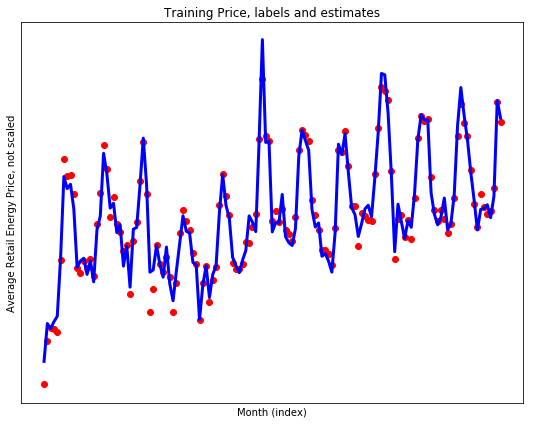

Explained Variance: [  9.54538494e-01   3.10268058e-02   6.66464813e-03   3.48533127e-03
   1.49852403e-03   9.76755603e-04   5.69215483e-04   2.90278915e-04
   1.74317708e-04   1.27294194e-04   1.18059349e-04   9.92382243e-05
   4.76342124e-05   4.32605730e-05]
Training Accuracy = 97.14 %
Coefficients: [ 0.0052576   0.01311678 -0.04051925  0.01322643 -0.02819694 -0.01187492
  0.00096032 -0.01189022  0.00829869  0.03300764 -0.00724048 -0.00970534
 -0.03537799  0.04279618]
Train RMSE: 0.06423643215595862


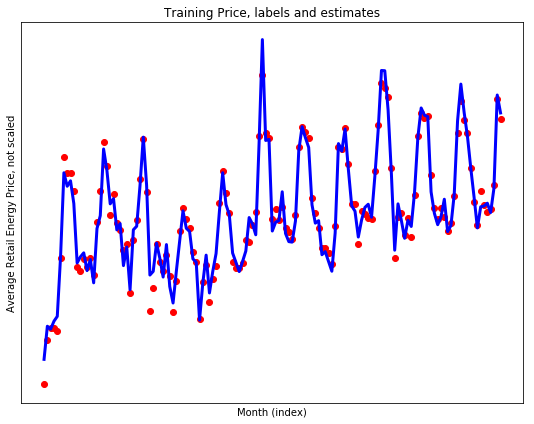

Explained Variance: [  9.54538494e-01   3.10268058e-02   6.66464813e-03   3.48533127e-03
   1.49852403e-03   9.76755603e-04   5.69215483e-04   2.90278915e-04
   1.74317708e-04   1.27294194e-04   1.18059349e-04   9.92382243e-05
   4.76342124e-05   4.32605730e-05   4.04891921e-05]
Training Accuracy = 97.14 %
Coefficients: [ 0.0052576   0.01311678 -0.04051925  0.01322643 -0.02819694 -0.01187492
  0.00096032 -0.01189022  0.00829869  0.03300764 -0.00724048 -0.00970534
 -0.03537799  0.04279618 -0.01027934]
Train RMSE: 0.06413268393870886


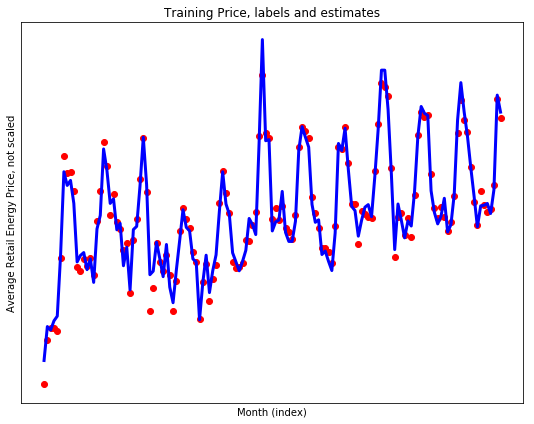

Explained Variance: [  9.54538494e-01   3.10268058e-02   6.66464813e-03   3.48533127e-03
   1.49852403e-03   9.76755603e-04   5.69215483e-04   2.90278915e-04
   1.74317708e-04   1.27294194e-04   1.18059349e-04   9.92382243e-05
   4.76342124e-05   4.32605730e-05   4.04891921e-05   3.50393030e-05]
Training Accuracy = 97.19 %
Coefficients: [ 0.0052576   0.01311678 -0.04051925  0.01322643 -0.02819694 -0.01187492
  0.00096032 -0.01189022  0.00829869  0.03300764 -0.00724048 -0.00970534
 -0.03537799  0.04279618 -0.01027934 -0.02507997]
Train RMSE: 0.06359553544007311


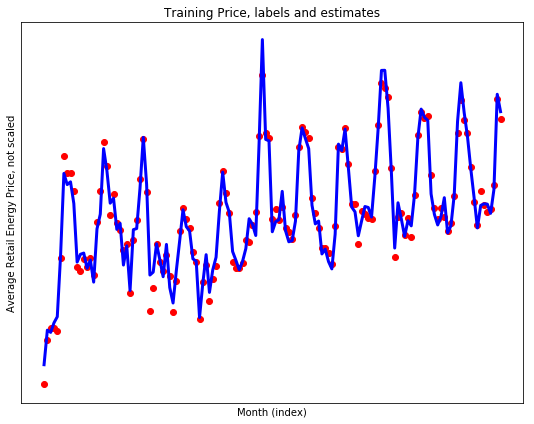

Explained Variance: [  9.54538494e-01   3.10268058e-02   6.66464813e-03   3.48533127e-03
   1.49852403e-03   9.76755603e-04   5.69215483e-04   2.90278915e-04
   1.74317708e-04   1.27294194e-04   1.18059349e-04   9.92382243e-05
   4.76342124e-05   4.32605730e-05   4.04891921e-05   3.50393030e-05
   3.16906876e-05]
Training Accuracy = 97.47 %
Coefficients: [ 0.0052576   0.01311678 -0.04051925  0.01322643 -0.02819694 -0.01187492
  0.00096032 -0.01189022  0.00829869  0.03300764 -0.00724048 -0.00970534
 -0.03537799  0.04279618 -0.01027934 -0.02507997  0.06394081]
Train RMSE: 0.06034122142708763


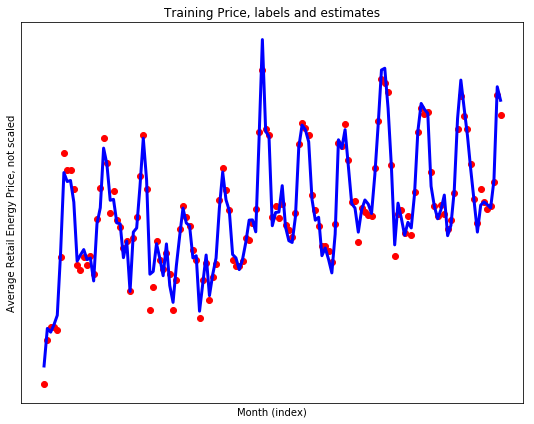

Explained Variance: [  9.54538494e-01   3.10268058e-02   6.66464813e-03   3.48533127e-03
   1.49852403e-03   9.76755603e-04   5.69215483e-04   2.90278915e-04
   1.74317708e-04   1.27294194e-04   1.18059349e-04   9.92382243e-05
   4.76342124e-05   4.32605730e-05   4.04891921e-05   3.50393030e-05
   3.16906876e-05   2.71809397e-05]
Training Accuracy = 97.49 %
Coefficients: [ 0.0052576   0.01311678 -0.04051925  0.01322643 -0.02819694 -0.01187492
  0.00096032 -0.01189022  0.00829869  0.03300764 -0.00724048 -0.00970534
 -0.03537799  0.04279618 -0.01027934 -0.02507997  0.06394081 -0.01482727]
Train RMSE: 0.06018688435148227


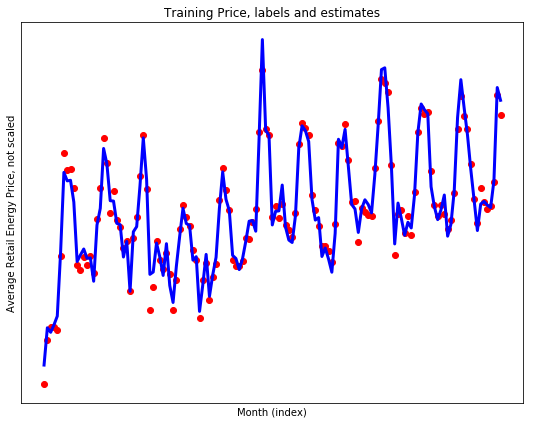

Explained Variance: [  9.54538494e-01   3.10268058e-02   6.66464813e-03   3.48533127e-03
   1.49852403e-03   9.76755603e-04   5.69215483e-04   2.90278915e-04
   1.74317708e-04   1.27294194e-04   1.18059349e-04   9.92382243e-05
   4.76342124e-05   4.32605730e-05   4.04891921e-05   3.50393030e-05
   3.16906876e-05   2.71809397e-05   2.36324314e-05]
Training Accuracy = 97.49 %
Coefficients: [ 0.0052576   0.01311678 -0.04051925  0.01322643 -0.02819694 -0.01187492
  0.00096032 -0.01189022  0.00829869  0.03300764 -0.00724048 -0.00970534
 -0.03537799  0.04279618 -0.01027934 -0.02507997  0.06394081 -0.01482727
 -0.01052641]
Train RMSE: 0.06011912752032635


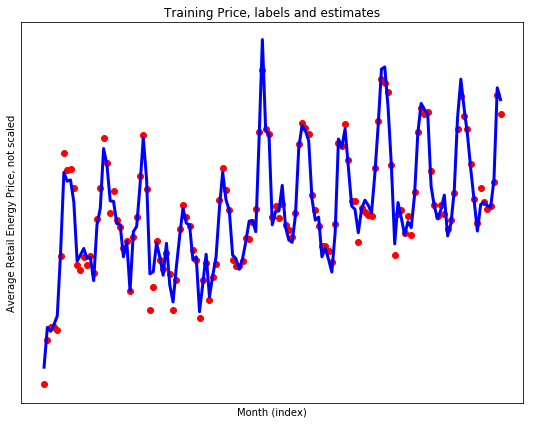

Explained Variance: [  9.54538494e-01   3.10268058e-02   6.66464813e-03   3.48533127e-03
   1.49852403e-03   9.76755603e-04   5.69215483e-04   2.90278915e-04
   1.74317708e-04   1.27294194e-04   1.18059349e-04   9.92382243e-05
   4.76342124e-05   4.32605730e-05   4.04891921e-05   3.50393030e-05
   3.16906876e-05   2.71809397e-05   2.36324314e-05   2.19137854e-05]
Training Accuracy = 97.88 %
Coefficients: [ 0.0052576   0.01311678 -0.04051925  0.01322643 -0.02819694 -0.01187492
  0.00096032 -0.01189022  0.00829869  0.03300764 -0.00724048 -0.00970534
 -0.03537799  0.04279618 -0.01027934 -0.02507997  0.06394081 -0.01482727
 -0.01052641 -0.09028111]
Train RMSE: 0.05530189086320987


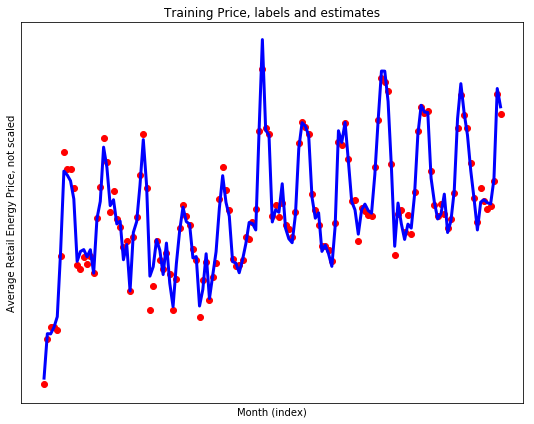

Explained Variance: [  9.54538494e-01   3.10268058e-02   6.66464813e-03   3.48533127e-03
   1.49852403e-03   9.76755603e-04   5.69215483e-04   2.90278915e-04
   1.74317708e-04   1.27294194e-04   1.18059349e-04   9.92382243e-05
   4.76342124e-05   4.32605730e-05   4.04891921e-05   3.50393030e-05
   3.16906876e-05   2.71809397e-05   2.36324314e-05   2.19137854e-05
   1.86277949e-05]
Training Accuracy = 97.97 %
Coefficients: [ 0.0052576   0.01311678 -0.04051925  0.01322643 -0.02819694 -0.01187492
  0.00096032 -0.01189022  0.00829869  0.03300764 -0.00724048 -0.00970534
 -0.03537799  0.04279618 -0.01027934 -0.02507997  0.06394081 -0.01482727
 -0.01052641 -0.09028111  0.04799749]
Train RMSE: 0.054080590494074716


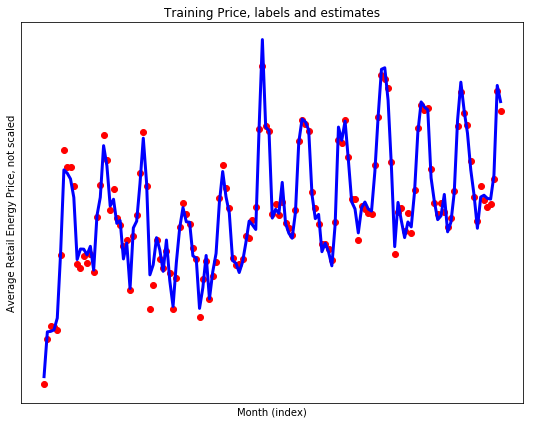

Explained Variance: [  9.54538494e-01   3.10268058e-02   6.66464813e-03   3.48533127e-03
   1.49852403e-03   9.76755603e-04   5.69215483e-04   2.90278915e-04
   1.74317708e-04   1.27294194e-04   1.18059349e-04   9.92382243e-05
   4.76342124e-05   4.32605730e-05   4.04891921e-05   3.50393030e-05
   3.16906876e-05   2.71809397e-05   2.36324314e-05   2.19137854e-05
   1.86277949e-05   1.75155635e-05]
Training Accuracy = 98.08 %
Coefficients: [ 0.0052576   0.01311678 -0.04051925  0.01322643 -0.02819694 -0.01187492
  0.00096032 -0.01189022  0.00829869  0.03300764 -0.00724048 -0.00970534
 -0.03537799  0.04279618 -0.01027934 -0.02507997  0.06394081 -0.01482727
 -0.01052641 -0.09028111  0.04799749 -0.05304022]
Train RMSE: 0.05264329886903618


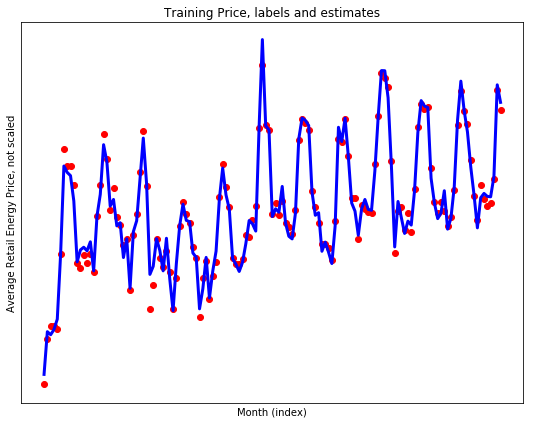

Explained Variance: [  9.54538494e-01   3.10268058e-02   6.66464813e-03   3.48533127e-03
   1.49852403e-03   9.76755603e-04   5.69215483e-04   2.90278915e-04
   1.74317708e-04   1.27294194e-04   1.18059349e-04   9.92382243e-05
   4.76342124e-05   4.32605730e-05   4.04891921e-05   3.50393030e-05
   3.16906876e-05   2.71809397e-05   2.36324314e-05   2.19137854e-05
   1.86277949e-05   1.75155635e-05   1.68684088e-05]
Training Accuracy = 98.17 %
Coefficients: [ 0.0052576   0.01311678 -0.04051925  0.01322643 -0.02819694 -0.01187492
  0.00096032 -0.01189022  0.00829869  0.03300764 -0.00724048 -0.00970534
 -0.03537799  0.04279618 -0.01027934 -0.02507997  0.06394081 -0.01482727
 -0.01052641 -0.09028111  0.04799749 -0.05304022 -0.04976256]
Train RMSE: 0.05139342948672181


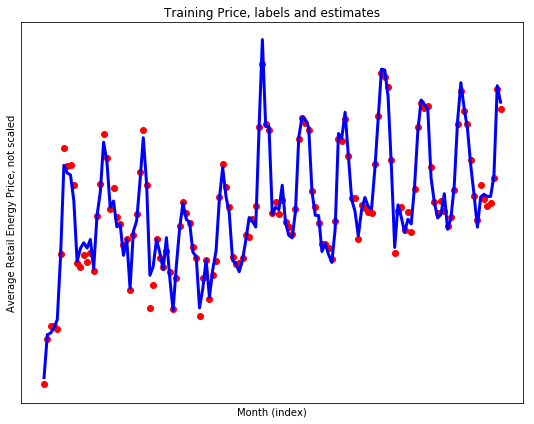

Explained Variance: [  9.54538494e-01   3.10268058e-02   6.66464813e-03   3.48533127e-03
   1.49852403e-03   9.76755603e-04   5.69215483e-04   2.90278915e-04
   1.74317708e-04   1.27294194e-04   1.18059349e-04   9.92382243e-05
   4.76342124e-05   4.32605730e-05   4.04891921e-05   3.50393030e-05
   3.16906876e-05   2.71809397e-05   2.36324314e-05   2.19137854e-05
   1.86277949e-05   1.75155635e-05   1.68684088e-05   1.41485104e-05]
Training Accuracy = 98.48 %
Coefficients: [ 0.0052576   0.01311678 -0.04051925  0.01322643 -0.02819694 -0.01187492
  0.00096032 -0.01189022  0.00829869  0.03300764 -0.00724048 -0.00970534
 -0.03537799  0.04279618 -0.01027934 -0.02507997  0.06394081 -0.01482727
 -0.01052641 -0.09028111  0.04799749 -0.05304022 -0.04976256  0.10132833]
Train RMSE: 0.04678750271513189


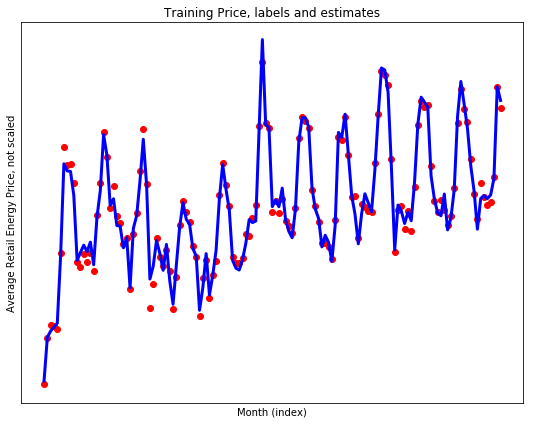

Explained Variance: [  9.54538494e-01   3.10268058e-02   6.66464813e-03   3.48533127e-03
   1.49852403e-03   9.76755603e-04   5.69215483e-04   2.90278915e-04
   1.74317708e-04   1.27294194e-04   1.18059349e-04   9.92382243e-05
   4.76342124e-05   4.32605730e-05   4.04891921e-05   3.50393030e-05
   3.16906876e-05   2.71809397e-05   2.36324314e-05   2.19137854e-05
   1.86277949e-05   1.75155635e-05   1.68684088e-05   1.41485104e-05
   1.37626628e-05]
Training Accuracy = 98.48 %
Coefficients: [ 0.0052576   0.01311678 -0.04051925  0.01322643 -0.02819694 -0.01187492
  0.00096032 -0.01189022  0.00829869  0.03300764 -0.00724048 -0.00970534
 -0.03537799  0.04279618 -0.01027934 -0.02507997  0.06394081 -0.01482727
 -0.01052641 -0.09028111  0.04799749 -0.05304022 -0.04976256  0.10132833
 -0.00995166]
Train RMSE: 0.0467421381915016


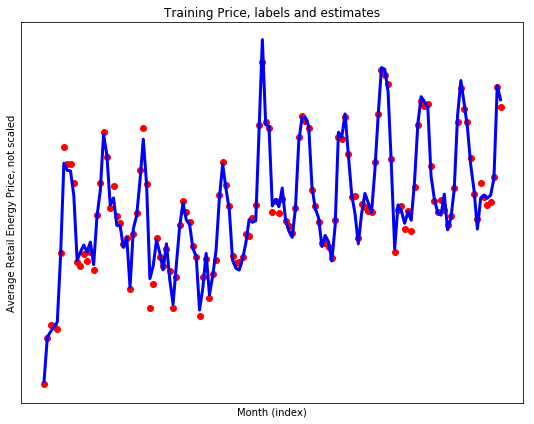

Explained Variance: [  9.54538494e-01   3.10268058e-02   6.66464813e-03   3.48533127e-03
   1.49852403e-03   9.76755603e-04   5.69215483e-04   2.90278915e-04
   1.74317708e-04   1.27294194e-04   1.18059349e-04   9.92382243e-05
   4.76342124e-05   4.32605730e-05   4.04891921e-05   3.50393030e-05
   3.16906876e-05   2.71809397e-05   2.36324314e-05   2.19137854e-05
   1.86277949e-05   1.75155635e-05   1.68684088e-05   1.41485104e-05
   1.37626628e-05   1.19726252e-05]
Training Accuracy = 98.56 %
Coefficients: [ 0.0052576   0.01311678 -0.04051925  0.01322643 -0.02819694 -0.01187492
  0.00096032 -0.01189022  0.00829869  0.03300764 -0.00724048 -0.00970534
 -0.03537799  0.04279618 -0.01027934 -0.02507997  0.06394081 -0.01482727
 -0.01052641 -0.09028111  0.04799749 -0.05304022 -0.04976256  0.10132833
 -0.00995166 -0.05487303]
Train RMSE: 0.04552587422004271


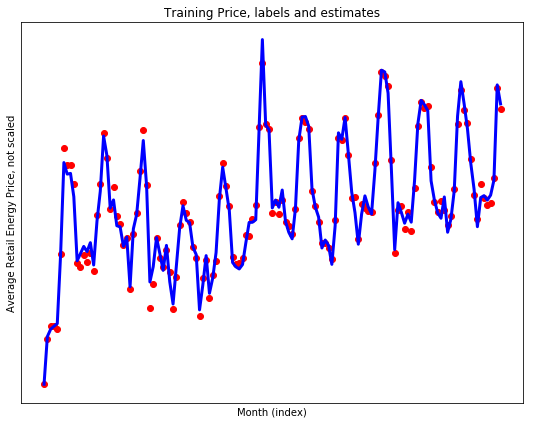

Explained Variance: [  9.54538494e-01   3.10268058e-02   6.66464813e-03   3.48533127e-03
   1.49852403e-03   9.76755603e-04   5.69215483e-04   2.90278915e-04
   1.74317708e-04   1.27294194e-04   1.18059349e-04   9.92382243e-05
   4.76342124e-05   4.32605730e-05   4.04891921e-05   3.50393030e-05
   3.16906876e-05   2.71809397e-05   2.36324314e-05   2.19137854e-05
   1.86277949e-05   1.75155635e-05   1.68684088e-05   1.41485104e-05
   1.37626628e-05   1.19726252e-05   9.53319748e-06]
Training Accuracy = 98.56 %
Coefficients: [ 0.0052576   0.01311678 -0.04051925  0.01322643 -0.02819694 -0.01187492
  0.00096032 -0.01189022  0.00829869  0.03300764 -0.00724048 -0.00970534
 -0.03537799  0.04279618 -0.01027934 -0.02507997  0.06394081 -0.01482727
 -0.01052641 -0.09028111  0.04799749 -0.05304022 -0.04976256  0.10132833
 -0.00995166 -0.05487303 -0.00287089]
Train RMSE: 0.04552318784378771


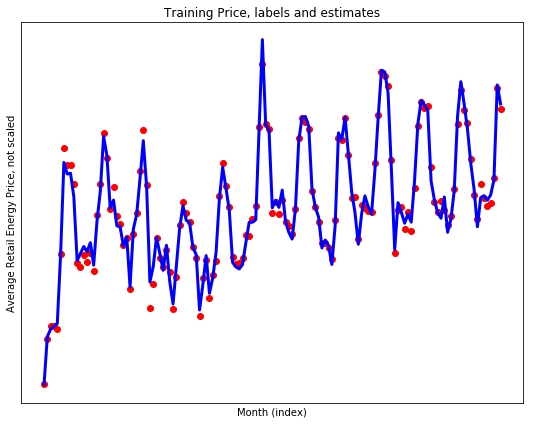

Explained Variance: [  9.54538494e-01   3.10268058e-02   6.66464813e-03   3.48533127e-03
   1.49852403e-03   9.76755603e-04   5.69215483e-04   2.90278915e-04
   1.74317708e-04   1.27294194e-04   1.18059349e-04   9.92382243e-05
   4.76342124e-05   4.32605730e-05   4.04891921e-05   3.50393030e-05
   3.16906876e-05   2.71809397e-05   2.36324314e-05   2.19137854e-05
   1.86277949e-05   1.75155635e-05   1.68684088e-05   1.41485104e-05
   1.37626628e-05   1.19726252e-05   9.53319748e-06   7.81888442e-06]
Training Accuracy = 98.72 %
Coefficients: [ 0.0052576   0.01311678 -0.04051925  0.01322643 -0.02819694 -0.01187492
  0.00096032 -0.01189022  0.00829869  0.03300764 -0.00724048 -0.00970534
 -0.03537799  0.04279618 -0.01027934 -0.02507997  0.06394081 -0.01482727
 -0.01052641 -0.09028111  0.04799749 -0.05304022 -0.04976256  0.10132833
 -0.00995166 -0.05487303 -0.00287089  0.09679671]
Train RMSE: 0.04294539143296236


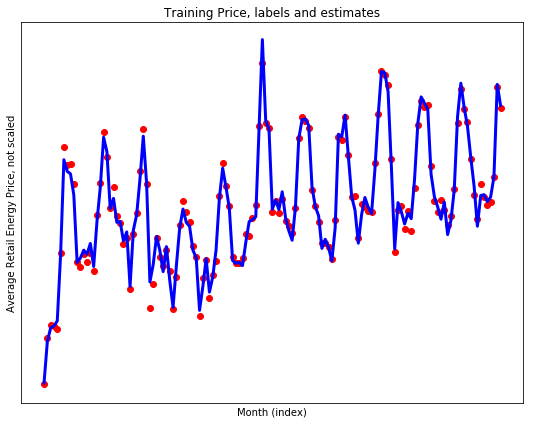

Explained Variance: [  9.54538494e-01   3.10268058e-02   6.66464813e-03   3.48533127e-03
   1.49852403e-03   9.76755603e-04   5.69215483e-04   2.90278915e-04
   1.74317708e-04   1.27294194e-04   1.18059349e-04   9.92382243e-05
   4.76342124e-05   4.32605730e-05   4.04891921e-05   3.50393030e-05
   3.16906876e-05   2.71809397e-05   2.36324314e-05   2.19137854e-05
   1.86277949e-05   1.75155635e-05   1.68684088e-05   1.41485104e-05
   1.37626628e-05   1.19726252e-05   9.53319748e-06   7.81888442e-06
   7.34172356e-06]
Training Accuracy = 98.91 %
Coefficients: [ 0.0052576   0.01311678 -0.04051925  0.01322643 -0.02819694 -0.01187492
  0.00096032 -0.01189022  0.00829869  0.03300764 -0.00724048 -0.00970534
 -0.03537799  0.04279618 -0.01027934 -0.02507997  0.06394081 -0.01482727
 -0.01052641 -0.09028111  0.04799749 -0.05304022 -0.04976256  0.10132833
 -0.00995166 -0.05487303 -0.00287089  0.09679671  0.11011742]
Train RMSE: 0.039587596066316705


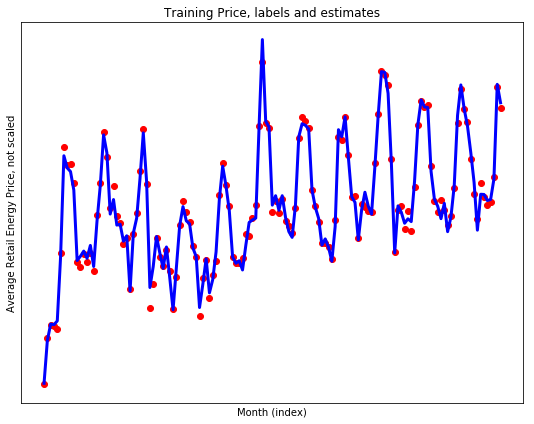

Explained Variance: [  9.54538494e-01   3.10268058e-02   6.66464813e-03   3.48533127e-03
   1.49852403e-03   9.76755603e-04   5.69215483e-04   2.90278915e-04
   1.74317708e-04   1.27294194e-04   1.18059349e-04   9.92382243e-05
   4.76342124e-05   4.32605730e-05   4.04891921e-05   3.50393030e-05
   3.16906876e-05   2.71809397e-05   2.36324314e-05   2.19137854e-05
   1.86277949e-05   1.75155635e-05   1.68684088e-05   1.41485104e-05
   1.37626628e-05   1.19726252e-05   9.53319748e-06   7.81888442e-06
   7.34172356e-06   5.99888998e-06]
Training Accuracy = 99.02 %
Coefficients: [ 0.0052576   0.01311678 -0.04051925  0.01322643 -0.02819694 -0.01187492
  0.00096032 -0.01189022  0.00829869  0.03300764 -0.00724048 -0.00970534
 -0.03537799  0.04279618 -0.01027934 -0.02507997  0.06394081 -0.01482727
 -0.01052641 -0.09028111  0.04799749 -0.05304022 -0.04976256  0.10132833
 -0.00995166 -0.05487303 -0.00287089  0.09679671  0.11011742 -0.09296898]
Train RMSE: 0.037493627346907706


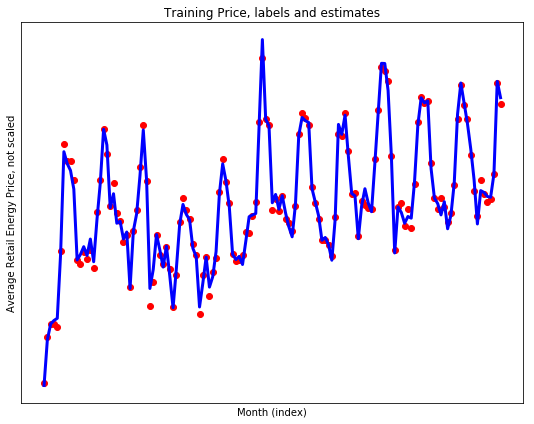

Explained Variance: [  9.54538494e-01   3.10268058e-02   6.66464813e-03   3.48533127e-03
   1.49852403e-03   9.76755603e-04   5.69215483e-04   2.90278915e-04
   1.74317708e-04   1.27294194e-04   1.18059349e-04   9.92382243e-05
   4.76342124e-05   4.32605730e-05   4.04891921e-05   3.50393030e-05
   3.16906876e-05   2.71809397e-05   2.36324314e-05   2.19137854e-05
   1.86277949e-05   1.75155635e-05   1.68684088e-05   1.41485104e-05
   1.37626628e-05   1.19726252e-05   9.53319748e-06   7.81888442e-06
   7.34172356e-06   5.99888998e-06   5.64899940e-06]
Training Accuracy = 99.1 %
Coefficients: [ 0.0052576   0.01311678 -0.04051925  0.01322643 -0.02819694 -0.01187492
  0.00096032 -0.01189022  0.00829869  0.03300764 -0.00724048 -0.00970534
 -0.03537799  0.04279618 -0.01027934 -0.02507997  0.06394081 -0.01482727
 -0.01052641 -0.09028111  0.04799749 -0.05304022 -0.04976256  0.10132833
 -0.00995166 -0.05487303 -0.00287089  0.09679671  0.11011742 -0.09296898
 -0.07816531]
Train RMSE: 0.0360323570

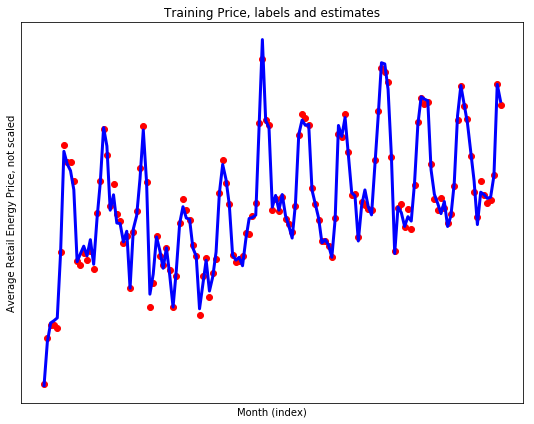

Explained Variance: [  9.54538494e-01   3.10268058e-02   6.66464813e-03   3.48533127e-03
   1.49852403e-03   9.76755603e-04   5.69215483e-04   2.90278915e-04
   1.74317708e-04   1.27294194e-04   1.18059349e-04   9.92382243e-05
   4.76342124e-05   4.32605730e-05   4.04891921e-05   3.50393030e-05
   3.16906876e-05   2.71809397e-05   2.36324314e-05   2.19137854e-05
   1.86277949e-05   1.75155635e-05   1.68684088e-05   1.41485104e-05
   1.37626628e-05   1.19726252e-05   9.53319748e-06   7.81888442e-06
   7.34172356e-06   5.99888998e-06   5.64899940e-06   4.97964571e-06]
Training Accuracy = 99.23 %
Coefficients: [ 0.0052576   0.01311678 -0.04051925  0.01322643 -0.02819694 -0.01187492
  0.00096032 -0.01189022  0.00829869  0.03300764 -0.00724048 -0.00970534
 -0.03537799  0.04279618 -0.01027934 -0.02507997  0.06394081 -0.01482727
 -0.01052641 -0.09028111  0.04799749 -0.05304022 -0.04976256  0.10132833
 -0.00995166 -0.05487303 -0.00287089  0.09679671  0.11011742 -0.09296898
 -0.07816531  0.1113

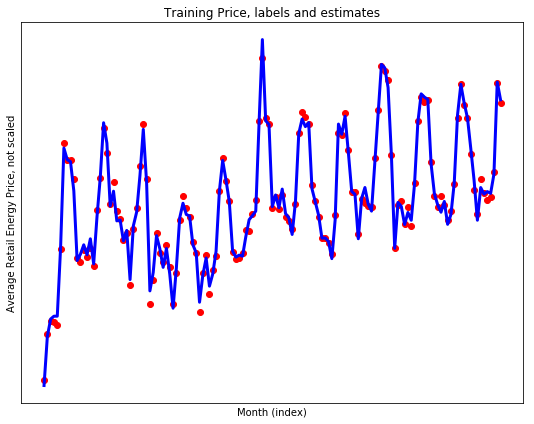

Explained Variance: [  9.54538494e-01   3.10268058e-02   6.66464813e-03   3.48533127e-03
   1.49852403e-03   9.76755603e-04   5.69215483e-04   2.90278915e-04
   1.74317708e-04   1.27294194e-04   1.18059349e-04   9.92382243e-05
   4.76342124e-05   4.32605730e-05   4.04891921e-05   3.50393030e-05
   3.16906876e-05   2.71809397e-05   2.36324314e-05   2.19137854e-05
   1.86277949e-05   1.75155635e-05   1.68684088e-05   1.41485104e-05
   1.37626628e-05   1.19726252e-05   9.53319748e-06   7.81888442e-06
   7.34172356e-06   5.99888998e-06   5.64899940e-06   4.97964571e-06
   4.34465270e-06]
Training Accuracy = 99.24 %
Coefficients: [ 0.0052576   0.01311678 -0.04051925  0.01322643 -0.02819694 -0.01187492
  0.00096032 -0.01189022  0.00829869  0.03300764 -0.00724048 -0.00970534
 -0.03537799  0.04279618 -0.01027934 -0.02507997  0.06394081 -0.01482727
 -0.01052641 -0.09028111  0.04799749 -0.05304022 -0.04976256  0.10132833
 -0.00995166 -0.05487303 -0.00287089  0.09679671  0.11011742 -0.09296898
 -

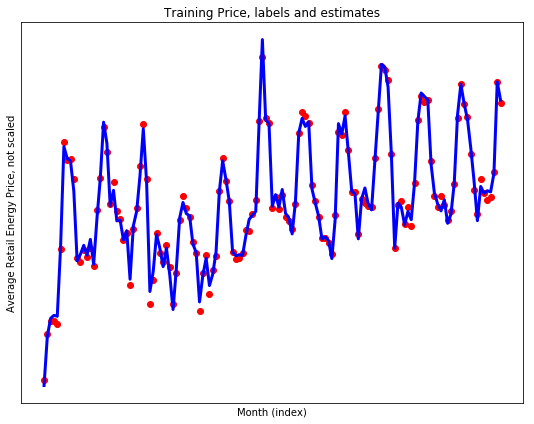

Explained Variance: [  9.54538494e-01   3.10268058e-02   6.66464813e-03   3.48533127e-03
   1.49852403e-03   9.76755603e-04   5.69215483e-04   2.90278915e-04
   1.74317708e-04   1.27294194e-04   1.18059349e-04   9.92382243e-05
   4.76342124e-05   4.32605730e-05   4.04891921e-05   3.50393030e-05
   3.16906876e-05   2.71809397e-05   2.36324314e-05   2.19137854e-05
   1.86277949e-05   1.75155635e-05   1.68684088e-05   1.41485104e-05
   1.37626628e-05   1.19726252e-05   9.53319748e-06   7.81888442e-06
   7.34172356e-06   5.99888998e-06   5.64899940e-06   4.97964571e-06
   4.34465270e-06   4.07801922e-06]
Training Accuracy = 99.55 %
Coefficients: [ 0.0052576   0.01311678 -0.04051925  0.01322643 -0.02819694 -0.01187492
  0.00096032 -0.01189022  0.00829869  0.03300764 -0.00724048 -0.00970534
 -0.03537799  0.04279618 -0.01027934 -0.02507997  0.06394081 -0.01482727
 -0.01052641 -0.09028111  0.04799749 -0.05304022 -0.04976256  0.10132833
 -0.00995166 -0.05487303 -0.00287089  0.09679671  0.110117

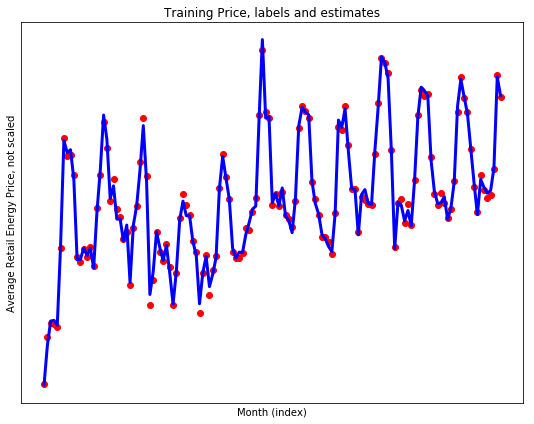

Explained Variance: [  9.54538494e-01   3.10268058e-02   6.66464813e-03   3.48533127e-03
   1.49852403e-03   9.76755603e-04   5.69215483e-04   2.90278915e-04
   1.74317708e-04   1.27294194e-04   1.18059349e-04   9.92382243e-05
   4.76342124e-05   4.32605730e-05   4.04891921e-05   3.50393030e-05
   3.16906876e-05   2.71809397e-05   2.36324314e-05   2.19137854e-05
   1.86277949e-05   1.75155635e-05   1.68684088e-05   1.41485104e-05
   1.37626628e-05   1.19726252e-05   9.53319748e-06   7.81888442e-06
   7.34172356e-06   5.99888998e-06   5.64899940e-06   4.97964571e-06
   4.34465270e-06   4.07801922e-06   2.93573384e-06]
Training Accuracy = 99.58 %
Coefficients: [ 0.0052576   0.01311678 -0.04051925  0.01322643 -0.02819694 -0.01187492
  0.00096032 -0.01189022  0.00829869  0.03300764 -0.00724048 -0.00970534
 -0.03537799  0.04279618 -0.01027934 -0.02507997  0.06394081 -0.01482727
 -0.01052641 -0.09028111  0.04799749 -0.05304022 -0.04976256  0.10132833
 -0.00995166 -0.05487303 -0.00287089  0.0

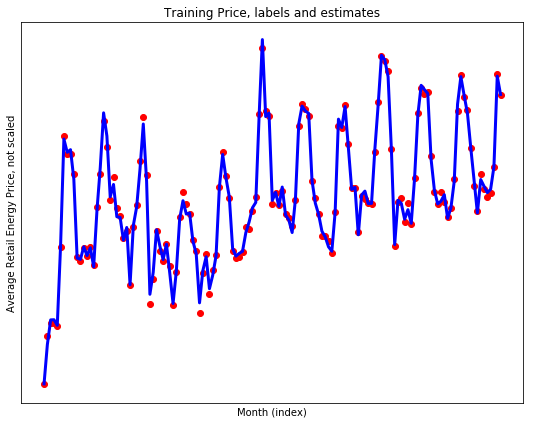

Explained Variance: [  9.54538494e-01   3.10268058e-02   6.66464813e-03   3.48533127e-03
   1.49852403e-03   9.76755603e-04   5.69215483e-04   2.90278915e-04
   1.74317708e-04   1.27294194e-04   1.18059349e-04   9.92382243e-05
   4.76342124e-05   4.32605730e-05   4.04891921e-05   3.50393030e-05
   3.16906876e-05   2.71809397e-05   2.36324314e-05   2.19137854e-05
   1.86277949e-05   1.75155635e-05   1.68684088e-05   1.41485104e-05
   1.37626628e-05   1.19726252e-05   9.53319748e-06   7.81888442e-06
   7.34172356e-06   5.99888998e-06   5.64899940e-06   4.97964571e-06
   4.34465270e-06   4.07801922e-06   2.93573384e-06   2.85610584e-06]
Training Accuracy = 99.6 %
Coefficients: [ 0.0052576   0.01311678 -0.04051925  0.01322643 -0.02819694 -0.01187492
  0.00096032 -0.01189022  0.00829869  0.03300764 -0.00724048 -0.00970534
 -0.03537799  0.04279618 -0.01027934 -0.02507997  0.06394081 -0.01482727
 -0.01052641 -0.09028111  0.04799749 -0.05304022 -0.04976256  0.10132833
 -0.00995166 -0.05487303 

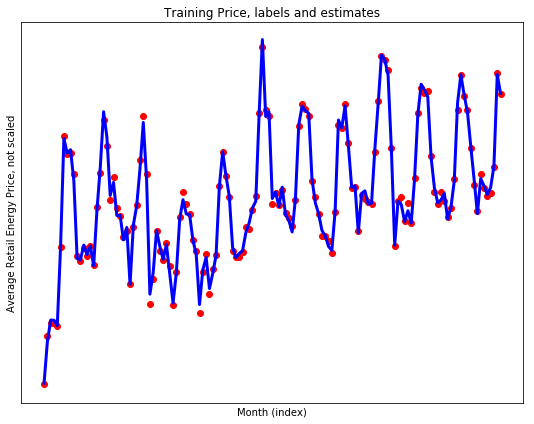

Explained Variance: [  9.54538494e-01   3.10268058e-02   6.66464813e-03   3.48533127e-03
   1.49852403e-03   9.76755603e-04   5.69215483e-04   2.90278915e-04
   1.74317708e-04   1.27294194e-04   1.18059349e-04   9.92382243e-05
   4.76342124e-05   4.32605730e-05   4.04891921e-05   3.50393030e-05
   3.16906876e-05   2.71809397e-05   2.36324314e-05   2.19137854e-05
   1.86277949e-05   1.75155635e-05   1.68684088e-05   1.41485104e-05
   1.37626628e-05   1.19726252e-05   9.53319748e-06   7.81888442e-06
   7.34172356e-06   5.99888998e-06   5.64899940e-06   4.97964571e-06
   4.34465270e-06   4.07801922e-06   2.93573384e-06   2.85610584e-06
   2.74632400e-06]
Training Accuracy = 99.73 %
Coefficients: [ 0.0052576   0.01311678 -0.04051925  0.01322643 -0.02819694 -0.01187492
  0.00096032 -0.01189022  0.00829869  0.03300764 -0.00724048 -0.00970534
 -0.03537799  0.04279618 -0.01027934 -0.02507997  0.06394081 -0.01482727
 -0.01052641 -0.09028111  0.04799749 -0.05304022 -0.04976256  0.10132833
 -0.00

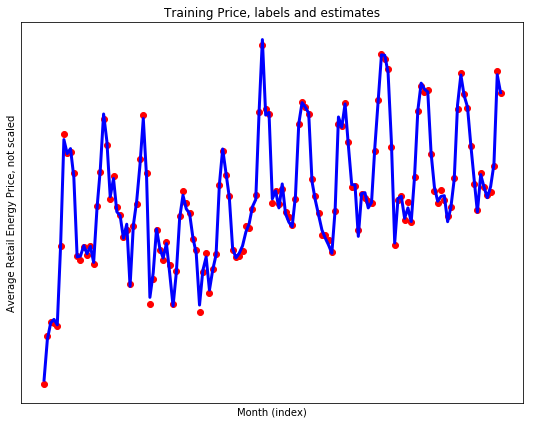

Explained Variance: [  9.54538494e-01   3.10268058e-02   6.66464813e-03   3.48533127e-03
   1.49852403e-03   9.76755603e-04   5.69215483e-04   2.90278915e-04
   1.74317708e-04   1.27294194e-04   1.18059349e-04   9.92382243e-05
   4.76342124e-05   4.32605730e-05   4.04891921e-05   3.50393030e-05
   3.16906876e-05   2.71809397e-05   2.36324314e-05   2.19137854e-05
   1.86277949e-05   1.75155635e-05   1.68684088e-05   1.41485104e-05
   1.37626628e-05   1.19726252e-05   9.53319748e-06   7.81888442e-06
   7.34172356e-06   5.99888998e-06   5.64899940e-06   4.97964571e-06
   4.34465270e-06   4.07801922e-06   2.93573384e-06   2.85610584e-06
   2.74632400e-06   2.45064747e-06]
Training Accuracy = 99.77 %
Coefficients: [ 0.0052576   0.01311678 -0.04051925  0.01322643 -0.02819694 -0.01187492
  0.00096032 -0.01189022  0.00829869  0.03300764 -0.00724048 -0.00970534
 -0.03537799  0.04279618 -0.01027934 -0.02507997  0.06394081 -0.01482727
 -0.01052641 -0.09028111  0.04799749 -0.05304022 -0.04976256  

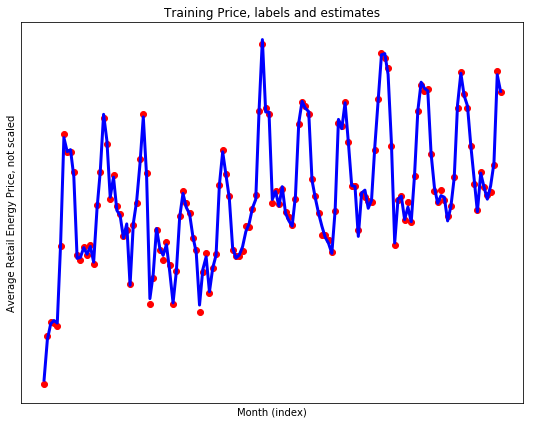

Explained Variance: [  9.54538494e-01   3.10268058e-02   6.66464813e-03   3.48533127e-03
   1.49852403e-03   9.76755603e-04   5.69215483e-04   2.90278915e-04
   1.74317708e-04   1.27294194e-04   1.18059349e-04   9.92382243e-05
   4.76342124e-05   4.32605730e-05   4.04891921e-05   3.50393030e-05
   3.16906876e-05   2.71809397e-05   2.36324314e-05   2.19137854e-05
   1.86277949e-05   1.75155635e-05   1.68684088e-05   1.41485104e-05
   1.37626628e-05   1.19726252e-05   9.53319748e-06   7.81888442e-06
   7.34172356e-06   5.99888998e-06   5.64899940e-06   4.97964571e-06
   4.34465270e-06   4.07801922e-06   2.93573384e-06   2.85610584e-06
   2.74632400e-06   2.45064747e-06   1.74696491e-06]
Training Accuracy = 99.81 %
Coefficients: [ 0.0052576   0.01311678 -0.04051925  0.01322643 -0.02819694 -0.01187492
  0.00096032 -0.01189022  0.00829869  0.03300764 -0.00724048 -0.00970534
 -0.03537799  0.04279618 -0.01027934 -0.02507997  0.06394081 -0.01482727
 -0.01052641 -0.09028111  0.04799749 -0.05304

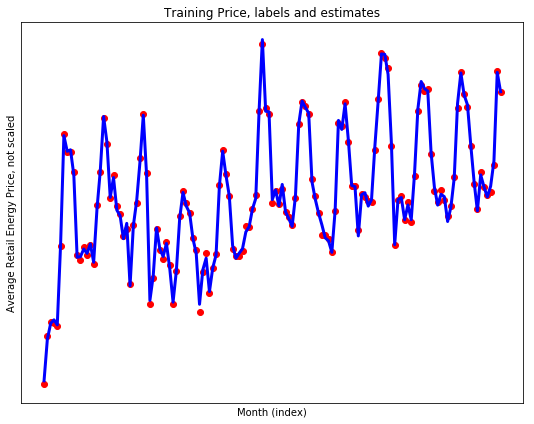

Explained Variance: [  9.54538494e-01   3.10268058e-02   6.66464813e-03   3.48533127e-03
   1.49852403e-03   9.76755603e-04   5.69215483e-04   2.90278915e-04
   1.74317708e-04   1.27294194e-04   1.18059349e-04   9.92382243e-05
   4.76342124e-05   4.32605730e-05   4.04891921e-05   3.50393030e-05
   3.16906876e-05   2.71809397e-05   2.36324314e-05   2.19137854e-05
   1.86277949e-05   1.75155635e-05   1.68684088e-05   1.41485104e-05
   1.37626628e-05   1.19726252e-05   9.53319748e-06   7.81888442e-06
   7.34172356e-06   5.99888998e-06   5.64899940e-06   4.97964571e-06
   4.34465270e-06   4.07801922e-06   2.93573384e-06   2.85610584e-06
   2.74632400e-06   2.45064747e-06   1.74696491e-06   1.24698146e-06]
Training Accuracy = 99.81 %
Coefficients: [ 0.0052576   0.01311678 -0.04051925  0.01322643 -0.02819694 -0.01187492
  0.00096032 -0.01189022  0.00829869  0.03300764 -0.00724048 -0.00970534
 -0.03537799  0.04279618 -0.01027934 -0.02507997  0.06394081 -0.01482727
 -0.01052641 -0.09028111  0.

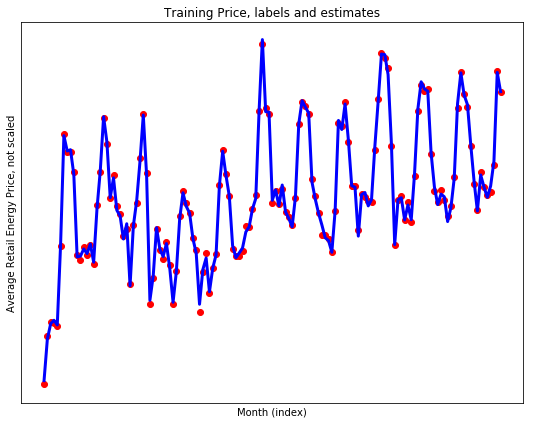

Explained Variance: [  9.54538494e-01   3.10268058e-02   6.66464813e-03   3.48533127e-03
   1.49852403e-03   9.76755603e-04   5.69215483e-04   2.90278915e-04
   1.74317708e-04   1.27294194e-04   1.18059349e-04   9.92382243e-05
   4.76342124e-05   4.32605730e-05   4.04891921e-05   3.50393030e-05
   3.16906876e-05   2.71809397e-05   2.36324314e-05   2.19137854e-05
   1.86277949e-05   1.75155635e-05   1.68684088e-05   1.41485104e-05
   1.37626628e-05   1.19726252e-05   9.53319748e-06   7.81888442e-06
   7.34172356e-06   5.99888998e-06   5.64899940e-06   4.97964571e-06
   4.34465270e-06   4.07801922e-06   2.93573384e-06   2.85610584e-06
   2.74632400e-06   2.45064747e-06   1.74696491e-06   1.24698146e-06
   1.01167563e-06]
Training Accuracy = 99.82 %
Coefficients: [ 0.0052576   0.01311678 -0.04051925  0.01322643 -0.02819694 -0.01187492
  0.00096032 -0.01189022  0.00829869  0.03300764 -0.00724048 -0.00970534
 -0.03537799  0.04279618 -0.01027934 -0.02507997  0.06394081 -0.01482727
 -0.010526

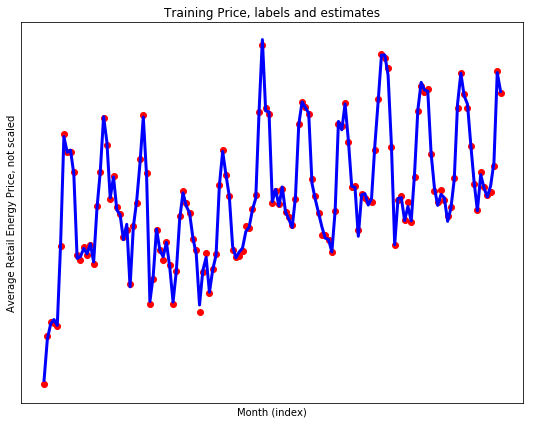

Explained Variance: [  9.54538494e-01   3.10268058e-02   6.66464813e-03   3.48533127e-03
   1.49852403e-03   9.76755603e-04   5.69215483e-04   2.90278915e-04
   1.74317708e-04   1.27294194e-04   1.18059349e-04   9.92382243e-05
   4.76342124e-05   4.32605730e-05   4.04891921e-05   3.50393030e-05
   3.16906876e-05   2.71809397e-05   2.36324314e-05   2.19137854e-05
   1.86277949e-05   1.75155635e-05   1.68684088e-05   1.41485104e-05
   1.37626628e-05   1.19726252e-05   9.53319748e-06   7.81888442e-06
   7.34172356e-06   5.99888998e-06   5.64899940e-06   4.97964571e-06
   4.34465270e-06   4.07801922e-06   2.93573384e-06   2.85610584e-06
   2.74632400e-06   2.45064747e-06   1.74696491e-06   1.24698146e-06
   1.01167563e-06   8.90190576e-07]
Training Accuracy = 99.86 %
Coefficients: [ 0.0052576   0.01311678 -0.04051925  0.01322643 -0.02819694 -0.01187492
  0.00096032 -0.01189022  0.00829869  0.03300764 -0.00724048 -0.00970534
 -0.03537799  0.04279618 -0.01027934 -0.02507997  0.06394081 -0.01

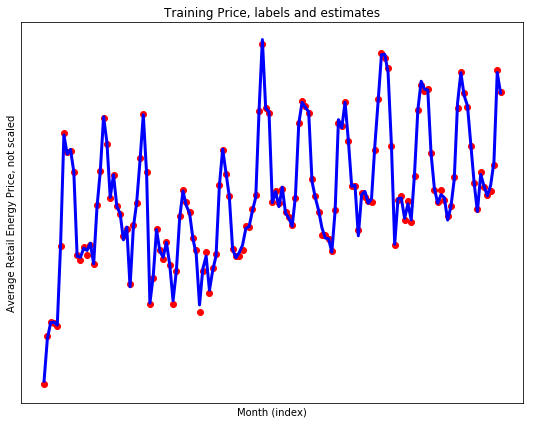

Explained Variance: [  9.54538494e-01   3.10268058e-02   6.66464813e-03   3.48533127e-03
   1.49852403e-03   9.76755603e-04   5.69215483e-04   2.90278915e-04
   1.74317708e-04   1.27294194e-04   1.18059349e-04   9.92382243e-05
   4.76342124e-05   4.32605730e-05   4.04891921e-05   3.50393030e-05
   3.16906876e-05   2.71809397e-05   2.36324314e-05   2.19137854e-05
   1.86277949e-05   1.75155635e-05   1.68684088e-05   1.41485104e-05
   1.37626628e-05   1.19726252e-05   9.53319748e-06   7.81888442e-06
   7.34172356e-06   5.99888998e-06   5.64899940e-06   4.97964571e-06
   4.34465270e-06   4.07801922e-06   2.93573384e-06   2.85610584e-06
   2.74632400e-06   2.45064747e-06   1.74696491e-06   1.24698146e-06
   1.01167563e-06   8.90190576e-07   4.90750139e-07]
Training Accuracy = 99.87 %
Coefficients: [ 0.0052576   0.01311678 -0.04051925  0.01322643 -0.02819694 -0.01187492
  0.00096032 -0.01189022  0.00829869  0.03300764 -0.00724048 -0.00970534
 -0.03537799  0.04279618 -0.01027934 -0.02507997 

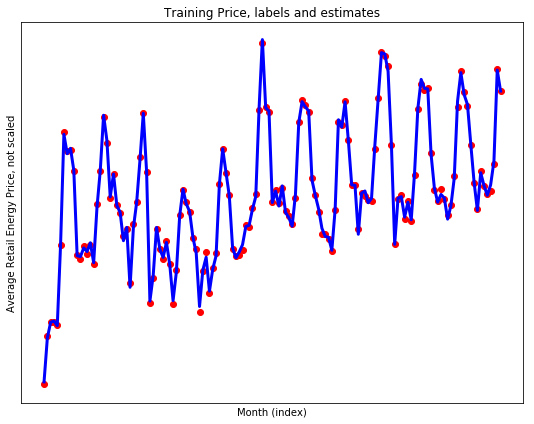

Explained Variance: [  9.54538494e-01   3.10268058e-02   6.66464813e-03   3.48533127e-03
   1.49852403e-03   9.76755603e-04   5.69215483e-04   2.90278915e-04
   1.74317708e-04   1.27294194e-04   1.18059349e-04   9.92382243e-05
   4.76342124e-05   4.32605730e-05   4.04891921e-05   3.50393030e-05
   3.16906876e-05   2.71809397e-05   2.36324314e-05   2.19137854e-05
   1.86277949e-05   1.75155635e-05   1.68684088e-05   1.41485104e-05
   1.37626628e-05   1.19726252e-05   9.53319748e-06   7.81888442e-06
   7.34172356e-06   5.99888998e-06   5.64899940e-06   4.97964571e-06
   4.34465270e-06   4.07801922e-06   2.93573384e-06   2.85610584e-06
   2.74632400e-06   2.45064747e-06   1.74696491e-06   1.24698146e-06
   1.01167563e-06   8.90190576e-07   4.90750139e-07   4.30379425e-07]
Training Accuracy = 99.89 %
Coefficients: [ 0.0052576   0.01311678 -0.04051925  0.01322643 -0.02819694 -0.01187492
  0.00096032 -0.01189022  0.00829869  0.03300764 -0.00724048 -0.00970534
 -0.03537799  0.04279618 -0.0102

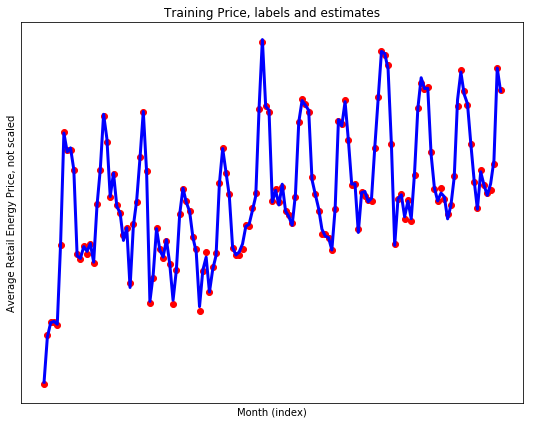

Explained Variance: [  9.54538494e-01   3.10268058e-02   6.66464813e-03   3.48533127e-03
   1.49852403e-03   9.76755603e-04   5.69215483e-04   2.90278915e-04
   1.74317708e-04   1.27294194e-04   1.18059349e-04   9.92382243e-05
   4.76342124e-05   4.32605730e-05   4.04891921e-05   3.50393030e-05
   3.16906876e-05   2.71809397e-05   2.36324314e-05   2.19137854e-05
   1.86277949e-05   1.75155635e-05   1.68684088e-05   1.41485104e-05
   1.37626628e-05   1.19726252e-05   9.53319748e-06   7.81888442e-06
   7.34172356e-06   5.99888998e-06   5.64899940e-06   4.97964571e-06
   4.34465270e-06   4.07801922e-06   2.93573384e-06   2.85610584e-06
   2.74632400e-06   2.45064747e-06   1.74696491e-06   1.24698146e-06
   1.01167563e-06   8.90190576e-07   4.90750139e-07   4.30379425e-07
   2.75218550e-07]
Training Accuracy = 99.93 %
Coefficients: [ 0.0052576   0.01311678 -0.04051925  0.01322643 -0.02819694 -0.01187492
  0.00096032 -0.01189022  0.00829869  0.03300764 -0.00724048 -0.00970534
 -0.03537799  

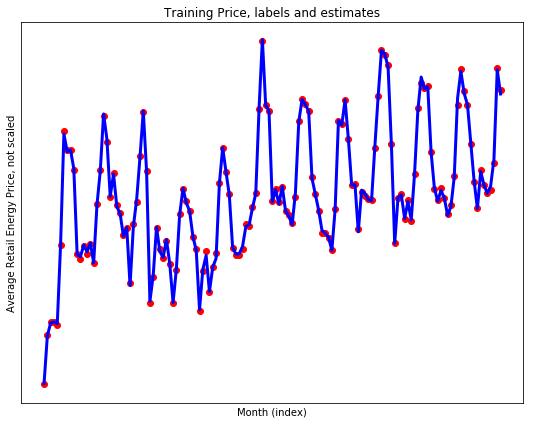

Explained Variance: [  9.54538494e-01   3.10268058e-02   6.66464813e-03   3.48533127e-03
   1.49852403e-03   9.76755603e-04   5.69215483e-04   2.90278915e-04
   1.74317708e-04   1.27294194e-04   1.18059349e-04   9.92382243e-05
   4.76342124e-05   4.32605730e-05   4.04891921e-05   3.50393030e-05
   3.16906876e-05   2.71809397e-05   2.36324314e-05   2.19137854e-05
   1.86277949e-05   1.75155635e-05   1.68684088e-05   1.41485104e-05
   1.37626628e-05   1.19726252e-05   9.53319748e-06   7.81888442e-06
   7.34172356e-06   5.99888998e-06   5.64899940e-06   4.97964571e-06
   4.34465270e-06   4.07801922e-06   2.93573384e-06   2.85610584e-06
   2.74632400e-06   2.45064747e-06   1.74696491e-06   1.24698146e-06
   1.01167563e-06   8.90190576e-07   4.90750139e-07   4.30379425e-07
   2.75218550e-07   1.91799569e-07]
Training Accuracy = 99.93 %
Coefficients: [ 0.0052576   0.01311678 -0.04051925  0.01322643 -0.02819694 -0.01187492
  0.00096032 -0.01189022  0.00829869  0.03300764 -0.00724048 -0.009705

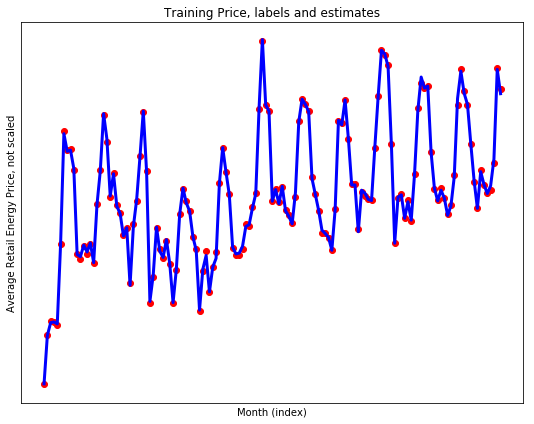

Explained Variance: [  9.54538494e-01   3.10268058e-02   6.66464813e-03   3.48533127e-03
   1.49852403e-03   9.76755603e-04   5.69215483e-04   2.90278915e-04
   1.74317708e-04   1.27294194e-04   1.18059349e-04   9.92382243e-05
   4.76342124e-05   4.32605730e-05   4.04891921e-05   3.50393030e-05
   3.16906876e-05   2.71809397e-05   2.36324314e-05   2.19137854e-05
   1.86277949e-05   1.75155635e-05   1.68684088e-05   1.41485104e-05
   1.37626628e-05   1.19726252e-05   9.53319748e-06   7.81888442e-06
   7.34172356e-06   5.99888998e-06   5.64899940e-06   4.97964571e-06
   4.34465270e-06   4.07801922e-06   2.93573384e-06   2.85610584e-06
   2.74632400e-06   2.45064747e-06   1.74696491e-06   1.24698146e-06
   1.01167563e-06   8.90190576e-07   4.90750139e-07   4.30379425e-07
   2.75218550e-07   1.91799569e-07   9.96570260e-08]
Training Accuracy = 99.94 %
Coefficients: [ 0.0052576   0.01311678 -0.04051925  0.01322643 -0.02819694 -0.01187492
  0.00096032 -0.01189022  0.00829869  0.03300764 -0.0

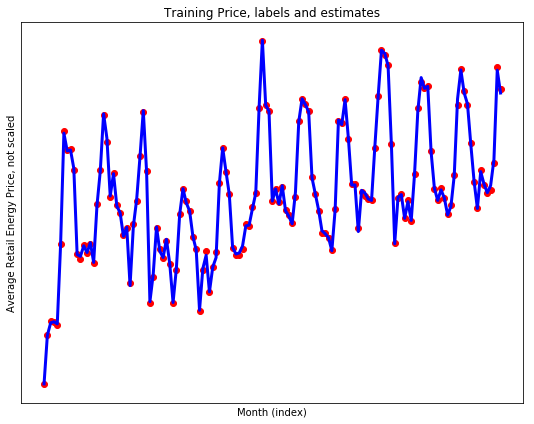

Explained Variance: [  9.54538494e-01   3.10268058e-02   6.66464813e-03   3.48533127e-03
   1.49852403e-03   9.76755603e-04   5.69215483e-04   2.90278915e-04
   1.74317708e-04   1.27294194e-04   1.18059349e-04   9.92382243e-05
   4.76342124e-05   4.32605730e-05   4.04891921e-05   3.50393030e-05
   3.16906876e-05   2.71809397e-05   2.36324314e-05   2.19137854e-05
   1.86277949e-05   1.75155635e-05   1.68684088e-05   1.41485104e-05
   1.37626628e-05   1.19726252e-05   9.53319748e-06   7.81888442e-06
   7.34172356e-06   5.99888998e-06   5.64899940e-06   4.97964571e-06
   4.34465270e-06   4.07801922e-06   2.93573384e-06   2.85610584e-06
   2.74632400e-06   2.45064747e-06   1.74696491e-06   1.24698146e-06
   1.01167563e-06   8.90190576e-07   4.90750139e-07   4.30379425e-07
   2.75218550e-07   1.91799569e-07   9.96570260e-08   6.79521821e-08]
Training Accuracy = 99.94 %
Coefficients: [ 0.0052576   0.01311678 -0.04051925  0.01322643 -0.02819694 -0.01187492
  0.00096032 -0.01189022  0.00829869

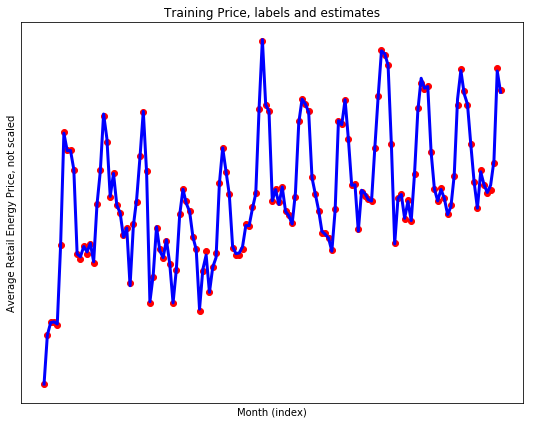

Explained Variance: [  9.54538494e-01   3.10268058e-02   6.66464813e-03   3.48533127e-03
   1.49852403e-03   9.76755603e-04   5.69215483e-04   2.90278915e-04
   1.74317708e-04   1.27294194e-04   1.18059349e-04   9.92382243e-05
   4.76342124e-05   4.32605730e-05   4.04891921e-05   3.50393030e-05
   3.16906876e-05   2.71809397e-05   2.36324314e-05   2.19137854e-05
   1.86277949e-05   1.75155635e-05   1.68684088e-05   1.41485104e-05
   1.37626628e-05   1.19726252e-05   9.53319748e-06   7.81888442e-06
   7.34172356e-06   5.99888998e-06   5.64899940e-06   4.97964571e-06
   4.34465270e-06   4.07801922e-06   2.93573384e-06   2.85610584e-06
   2.74632400e-06   2.45064747e-06   1.74696491e-06   1.24698146e-06
   1.01167563e-06   8.90190576e-07   4.90750139e-07   4.30379425e-07
   2.75218550e-07   1.91799569e-07   9.96570260e-08   6.79521821e-08
   4.62134103e-08]
Training Accuracy = 99.97 %
Coefficients: [ 0.0052576   0.01311678 -0.04051925  0.01322643 -0.02819694 -0.01187492
  0.00096032 -0.01

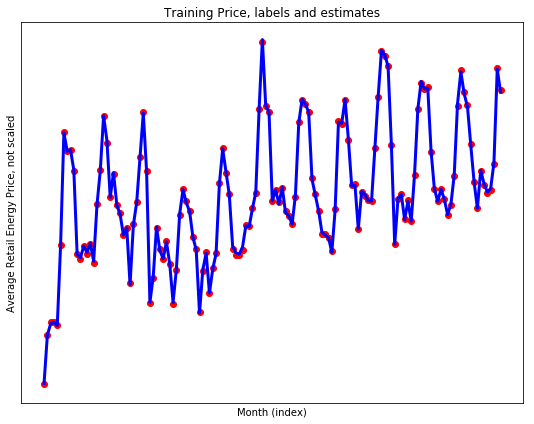

Explained Variance: [  9.54538494e-01   3.10268058e-02   6.66464813e-03   3.48533127e-03
   1.49852403e-03   9.76755603e-04   5.69215483e-04   2.90278915e-04
   1.74317708e-04   1.27294194e-04   1.18059349e-04   9.92382243e-05
   4.76342124e-05   4.32605730e-05   4.04891921e-05   3.50393030e-05
   3.16906876e-05   2.71809397e-05   2.36324314e-05   2.19137854e-05
   1.86277949e-05   1.75155635e-05   1.68684088e-05   1.41485104e-05
   1.37626628e-05   1.19726252e-05   9.53319748e-06   7.81888442e-06
   7.34172356e-06   5.99888998e-06   5.64899940e-06   4.97964571e-06
   4.34465270e-06   4.07801922e-06   2.93573384e-06   2.85610584e-06
   2.74632400e-06   2.45064747e-06   1.74696491e-06   1.24698146e-06
   1.01167563e-06   8.90190576e-07   4.90750139e-07   4.30379425e-07
   2.75218550e-07   1.91799569e-07   9.96570260e-08   6.79521821e-08
   4.62134103e-08   3.79057871e-08]
Training Accuracy = 99.98 %
Coefficients: [ 0.0052576   0.01311678 -0.04051925  0.01322643 -0.02819694 -0.01187492
 

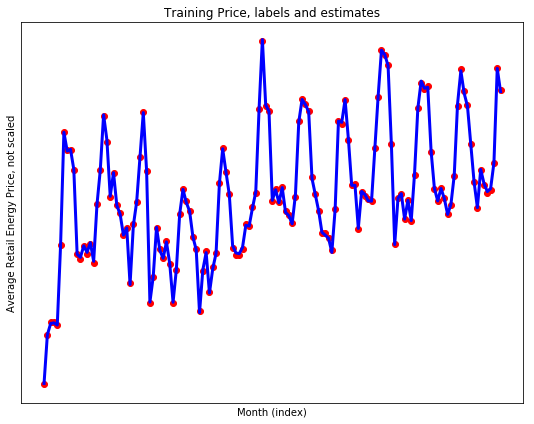

Explained Variance: [  9.54538494e-01   3.10268058e-02   6.66464813e-03   3.48533127e-03
   1.49852403e-03   9.76755603e-04   5.69215483e-04   2.90278915e-04
   1.74317708e-04   1.27294194e-04   1.18059349e-04   9.92382243e-05
   4.76342124e-05   4.32605730e-05   4.04891921e-05   3.50393030e-05
   3.16906876e-05   2.71809397e-05   2.36324314e-05   2.19137854e-05
   1.86277949e-05   1.75155635e-05   1.68684088e-05   1.41485104e-05
   1.37626628e-05   1.19726252e-05   9.53319748e-06   7.81888442e-06
   7.34172356e-06   5.99888998e-06   5.64899940e-06   4.97964571e-06
   4.34465270e-06   4.07801922e-06   2.93573384e-06   2.85610584e-06
   2.74632400e-06   2.45064747e-06   1.74696491e-06   1.24698146e-06
   1.01167563e-06   8.90190576e-07   4.90750139e-07   4.30379425e-07
   2.75218550e-07   1.91799569e-07   9.96570260e-08   6.79521821e-08
   4.62134103e-08   3.79057871e-08   3.01802463e-08]
Training Accuracy = 99.98 %
Coefficients: [ 0.0052576   0.01311678 -0.04051925  0.01322643 -0.02819

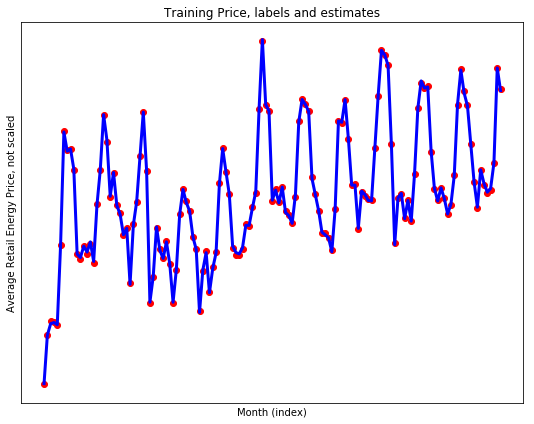

In [67]:
#run principal component analysis (PCA) on remaining data and create transformed datasets with reduced dimensionality

#run PCA on remaining data
%run helper_functions.py 
PCAdims = X_df.shape[1]   #input desired number of dimensions here not including price
#PCAdims = 40  #input desired number of dimensions here not including price
#PCAdims = PCAdims
B_list,B_test_list, acc_list, RMSE_list = PCA_transform(X_df,Y_df,red_x_test,y_test,test_dims=PCAdims)

In [257]:
#PCA_test_data.columns.astype(str)

In [84]:
#PCA_train_data = pd.DataFrame(B_list[PCAdims-3])
PCA_train_data = pd.DataFrame(B_list[13])    #use number of desired dimensions minus 2
PCA_train_data['Price'] = augmented_data.dropna()['Price']
PCA_train_data.head()

0         1         2         3         4         5         6  \
0 -46.672207 -6.369790  9.496597  1.483071  6.967114  3.173389 -0.187920   
1 -40.399885 -9.190646  5.446387 -0.973317  2.862980 -0.218145  0.976056   
2 -42.546347 -4.916738  7.161350  0.709351  4.691504  1.330910  0.002903   
3 -41.573696 -6.181670  6.435114 -1.649230  2.626974 -0.066461  1.581765   
4 -40.342617  4.509834  8.931617 -4.492766  1.715720 -0.882420  1.700943   

          7         8         9        10        11        12        13  \
0  0.510679 -0.403420 -0.591113  0.085452  1.154349 -0.188103  0.262303   
1  1.931184 -1.285176 -0.428669  1.141744  0.470873  0.301980 -0.509279   
2  0.027001 -0.718836 -0.682807  0.488840  1.077600 -0.348023 -0.187331   
3  1.040297 -0.549672 -0.462882  0.822682  1.020030  0.013532 -0.044716   
4  0.360629  0.287344 -1.016391  0.827127  1.557580 -0.004176 -0.144551   

         14     Price  
0  0.741414  2.000000  
1  0.277020  2.284830  
2  0.647597  2.365325  
3 -0.151836  2.362229  
4 -0.058293  2.343653

In [85]:
list(PCA_train_data)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 'Price']

In [86]:
PCA_train_data.columns = PCA_train_data.columns.astype(str)
PCA_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 16 columns):
0        139 non-null float64
1        139 non-null float64
2        139 non-null float64
3        139 non-null float64
4        139 non-null float64
5        139 non-null float64
6        139 non-null float64
7        139 non-null float64
8        139 non-null float64
9        139 non-null float64
10       139 non-null float64
11       139 non-null float64
12       139 non-null float64
13       139 non-null float64
14       139 non-null float64
Price    139 non-null float64
dtypes: float64(16)
memory usage: 17.5 KB


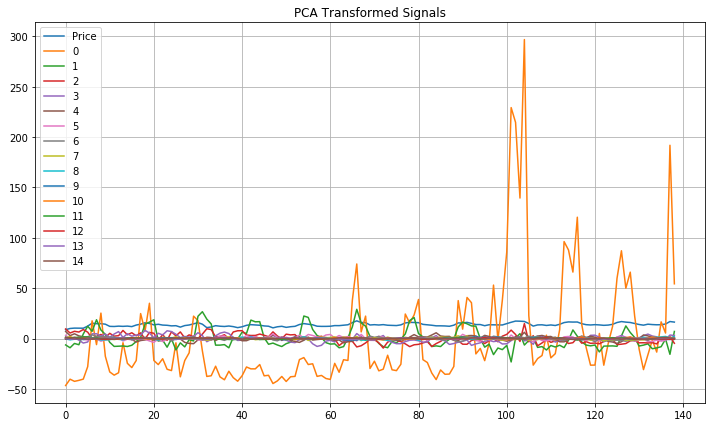

In [87]:
plt.figure(figsize=(12,7))
plt.plot(range(len(PCA_train_data)), all_rescaler(PCA_train_data.Price))
for i in range(len(list(PCA_train_data))-1):
    plt.plot(range(len(PCA_train_data)), PCA_train_data[list(PCA_train_data)[i]])
plt.title('PCA Transformed Signals')
plt.legend()
plt.grid()
plt.show()

In [88]:
#PCA_train_data = pd.DataFrame(B_list[PCAdims-3])
PCA_train_data = pd.DataFrame(B_list[0])    #use number of desired dimensions minus 2
PCA_train_data['Price'] = augmented_data.dropna()['Price']
PCA_train_data.head()
PCA_train_data.columns = PCA_train_data.columns.astype(str)
PCA_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 3 columns):
0        139 non-null float64
1        139 non-null float64
Price    139 non-null float64
dtypes: float64(3)
memory usage: 3.3 KB


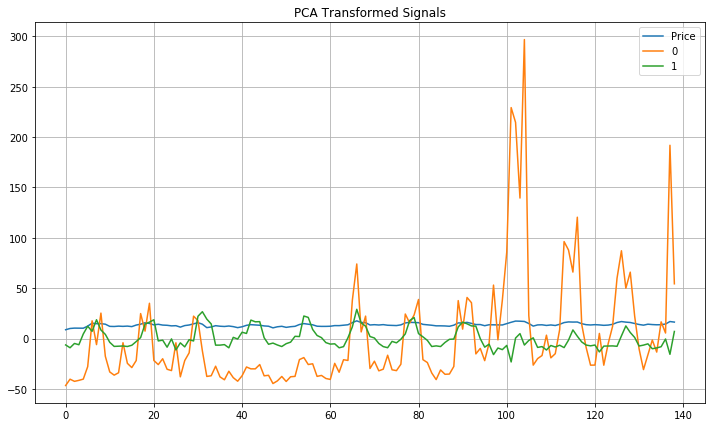

In [89]:
plt.figure(figsize=(12,7))
plt.plot(range(len(PCA_train_data)), all_rescaler(PCA_train_data.Price))
for i in range(len(list(PCA_train_data))-1):
    plt.plot(range(len(PCA_train_data)), PCA_train_data[list(PCA_train_data)[i]])
plt.title('PCA Transformed Signals')
plt.legend()
plt.grid()
plt.show()

In [90]:
PCA_train_data.shape

(139, 3)

In [91]:
PCA_train_data.to_csv('EPPdf8_15.csv', sep=',')

## Standard Docket

Compare solution accuracy to classic regression methods. More rigorous comparison can be found in the main project pipeline.

In [93]:
#view final dataset
PCA_train_data['Price'] = all_rescaler(std_all_data['Price'])
PCA_train_data.head()
#maybe select the optimal offset for each value and use that as a feature, that way we can combine the hopping lasso with other models as an ensemble.

0         1  Price
0 -46.672207 -6.369790   8.71
1 -40.399885 -9.190646   9.63
2 -42.546347 -4.916738   9.89
3 -41.573696 -6.181670   9.88
4 -40.342617  4.509834   9.82

In [94]:
all_rescaler(std_all_data['Price']) # equal to raw_data['Price']
docket_df = PCA_train_data
docket_df['Price'] = all_rescaler(std_all_data['Price'])
docket_df

0          1  Price
0    -46.672207  -6.369790   8.71
1    -40.399885  -9.190646   9.63
2    -42.546347  -4.916738   9.89
3    -41.573696  -6.181670   9.88
4    -40.342617   4.509834   9.82
5    -27.947584  12.234021  11.34
6     17.561090   7.119950  13.47
7     -6.059371  18.628377  13.12
8     25.235249   8.442389  13.13
9    -17.670604   4.106399  12.74
10   -33.208346  -3.761246  11.16
11   -36.382249  -7.841319  11.07
12   -34.010790  -7.671950  11.32
13    -4.180540  -7.428193  11.17
14   -24.665909  -7.930209  11.35
15   -28.867293  -6.702116  10.99
16   -21.853754  -3.018522  12.11
17    24.775990   0.929128  12.75
18     7.331242  14.319218  13.77
19    34.997333  16.255590  13.27
20   -21.840187  18.610786  12.24
21   -25.897307  -2.408834  12.68
22   -20.084964  -1.614096  12.09
23   -30.535253  -8.624288  11.94
24   -31.857201  -0.404369  11.52
25    -4.266863 -11.326407  11.65
26   -38.059539  -4.320698  10.62
27   -21.909337  -8.294589  11.73
28   -14.226566  -1.111960  12.15
29    22.192076  -2.439260  13.00
..          ...        ...    ...
109    3.307375 -11.409614  11.83
110  -19.215335  -6.933847  12.18
111  -15.072657  -8.436739  11.79
112    8.904748  -6.678292  12.66
113   96.242964  -9.035111  13.91
114   87.924034  -1.625206  14.39
115   65.976904   8.545171  14.28
116  120.472841   2.263250  14.32
117   13.913847  -3.431679  13.09
118   -8.925152  -6.509444  12.39
119  -26.473853  -7.278804  12.17
120  -26.386970  -6.471487  12.40
121    5.048456 -13.307239  12.21
122  -26.507367  -7.553598  11.91
123   -4.978593  -7.504462  12.09
124   12.169552  -7.345667  12.64
125   59.826550  -7.739831  13.96
126   87.138154   2.595876  14.64
127   49.981753  12.512176  14.23
128   65.900747   5.970446  13.97
129   22.180124   1.050429  13.24
130  -10.275687  -7.449180  12.52
131  -30.887928  -6.563070  12.03
132  -16.168094  -5.296935  12.74
133   -1.522515 -10.171976  12.46
134  -13.474408  -9.340483  12.31
135   16.538912  -8.156041  12.37
136    5.454551  -0.501817  12.87
137  191.914684 -15.694575  14.67
138   54.338721   6.999343  14.26

[139 rows x 3 columns]

In [95]:
#docket_df = all_slid_df

Lag: 13
Coefficients: [ 1.11990971  0.74208752 -0.05273988  0.00353473 -0.11479973  0.02635246
  0.03296638  0.06049761 -0.11455287 -0.00115176  0.04810393  0.25372733
  0.26002856 -0.23130475]
predicted=14.610530, expected=14.230000
predicted=14.141676, expected=13.970000
predicted=13.152667, expected=13.240000
predicted=12.521415, expected=12.520000
predicted=12.335216, expected=12.030000
predicted=12.367001, expected=12.740000
predicted=12.217618, expected=12.460000
predicted=12.092245, expected=12.310000
predicted=12.272807, expected=12.370000
predicted=12.846439, expected=12.870000
predicted=13.736788, expected=14.670000
predicted=14.283047, expected=14.260000
Test RMSE: 0.342


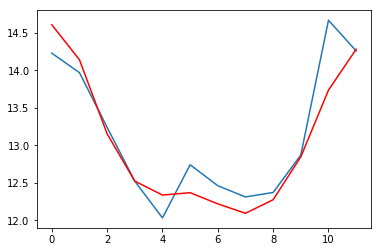

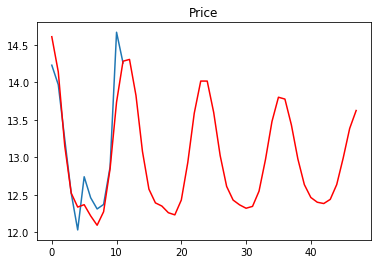

In [96]:
#Linear Regression with MMS of final dataset. Requires ARIMAtization of past data or the slid dataframe in the right format

#ARIMAtization
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
#series = Series.from_csv('PCA_train_data', header=0)
series = docket_df['Price']
# split dataset
X = series.values
train, test = X[0:len(X)-12], X[len(X)-12:]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = math.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % error)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

# print the predicted data (the bule one is the real data, the red one is the predicted data)
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1+3*12, dynamic=False)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.title('Price')
pyplot.show()

Lag: 12
Coefficients: [ 1.03425175  0.76145306 -0.12785231 -0.04925513 -0.07039287  0.03309312
  0.03744617  0.08005928 -0.1632074   0.0517598   0.04884775  0.27282569
  0.04683252]
Test RMSE: 0.510


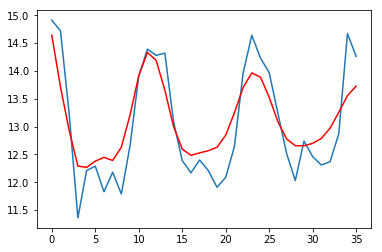

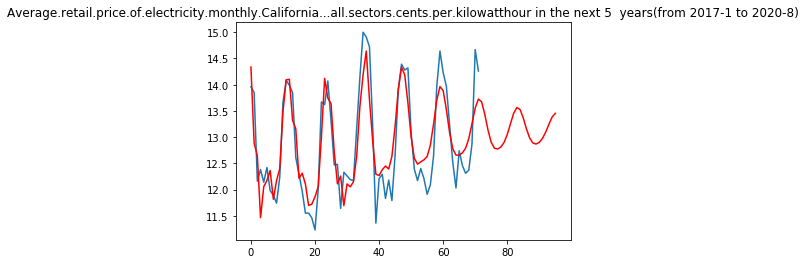

In [99]:
# use time series predict retail price directly ***3 years
from math import sqrt
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
#series = Series.from_csv('Price', header=0)
series = docket_df['Price']
# split dataset
X = series.values
train, test = X[0:len(X)-12*3], X[len(X)-12*3:]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
#for i in range(len(predictions)):
#    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % error)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

# print the predicted data (the bule one is the real data, the red one is the predicted data)
predictions = model_fit.predict(start=len(train)-12*3, end=len(train)+len(test)-1+2*12, dynamic=False)
pyplot.plot(X[len(train)-12*3:])
pyplot.plot(predictions, color='red')
pyplot.title('Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour in the next 5  years(from 2017-1 to 2020-8)')
pyplot.show()

Test RMSE: 79.447
Test RMSE: 8.242
Test RMSE: 0.917


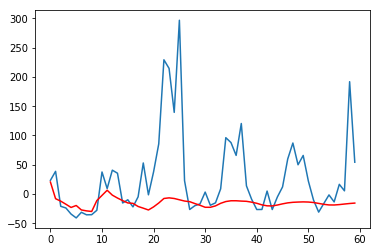

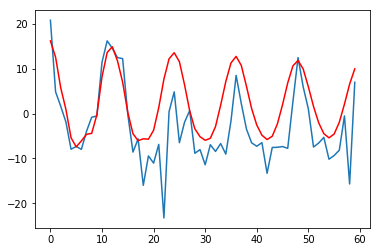

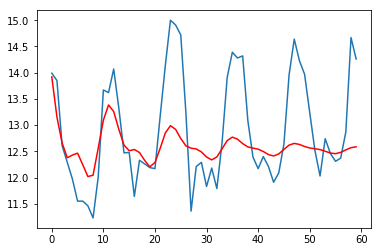

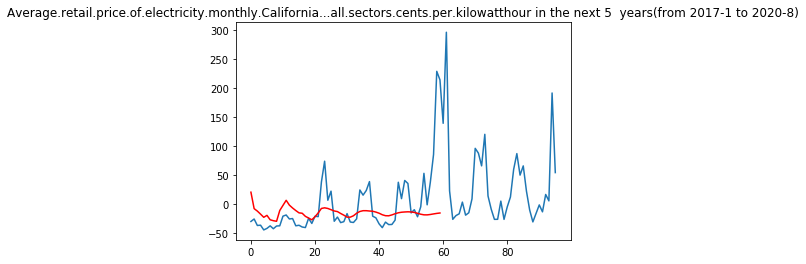

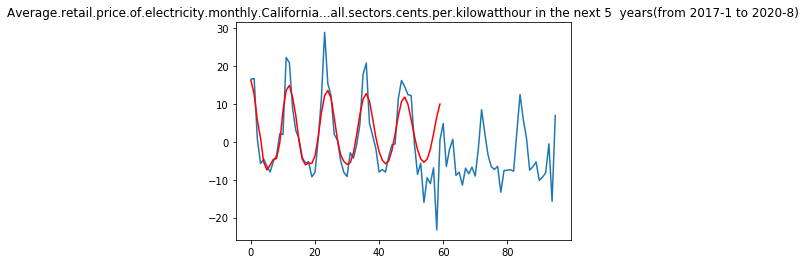

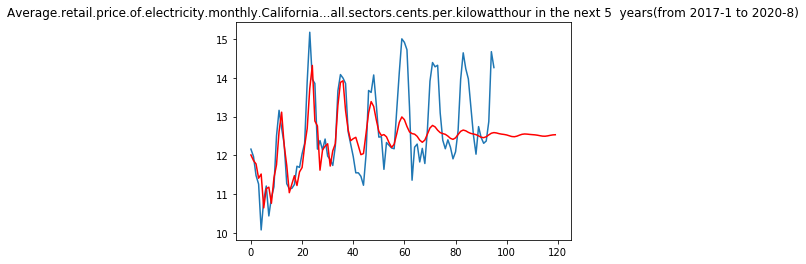

In [102]:
# use time series predict retail price directly ***5 years

from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

feats = list(np.arange(1,len(list(docket_df))+1))
feat_preds = list()
feat_test = list()
feat_train = list()
feat_X = list()

for feat_num in feats:
    #series = Series.from_csv('Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour.csv', header=0)
    series = docket_df[list(docket_df)[feat_num-1]]
    # split dataset
    X = series.values
    train, test = X[0:len(X)-12*5], X[len(X)-12*5:]
    # train autoregression
    model = AR(train)
    model_fit = model.fit()
    #print('Lag: %s' % model_fit.k_ar)
    #print('Coefficients: %s' % model_fit.params)
    # make predictions
    predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
    feat_preds.append(predictions)
    feat_test.append(test)
    feat_train.append(train)
    feat_X.append(X)
    #for i in range(len(predictions)):
    #    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
    error = math.sqrt(mean_squared_error(test, predictions))
    print('Test RMSE: %.3f' % error)
    # plot results


pyplot.plot(feat_test[0])
pyplot.plot(feat_preds[0], color='red')
pyplot.show()    
    
pyplot.plot(feat_test[1])
pyplot.plot(feat_preds[1], color='red')
pyplot.show()    

    
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


# print the predicted data (the bule one is the real data, the red one is the predicted data)
predictions = model_fit.predict(start=len(feat_train[0])-12*3, end=len(feat_train[0])+len(feat_test[0])-1+2*12, dynamic=False)
pyplot.plot(feat_X[0][len(feat_train[0])-12*3:])
pyplot.plot(feat_preds[0], color='red')
pyplot.title('Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour in the next 5  years(from 2017-1 to 2020-8)')
pyplot.show()


# print the predicted data (the bule one is the real data, the red one is the predicted data)
predictions = model_fit.predict(start=len(feat_train[1])-12*3, end=len(feat_train[1])+len(feat_test[1])-1+2*12, dynamic=False)
pyplot.plot(feat_X[1][len(feat_train[1])-12*3:])
pyplot.plot(feat_preds[1], color='red')
pyplot.title('Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour in the next 5  years(from 2017-1 to 2020-8)')
pyplot.show()


# print the predicted data (the bule one is the real data, the red one is the predicted data)
predictions = model_fit.predict(start=len(train)-12*3, end=len(train)+len(test)-1+2*12, dynamic=False)
pyplot.plot(X[len(train)-12*3:])
pyplot.plot(predictions, color='red')
pyplot.title('Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour in the next 5  years(from 2017-1 to 2020-8)')
pyplot.show()

In [103]:
len(train)

79

In [104]:
df_ARIMA = pd.DataFrame({'0': feat_preds[0],
 '1': feat_preds[1],
 'ARIMA_Price': feat_preds[2]})
                   
####Full_df = pd.concat([train, df_ARIMA], ignore_index=True)

df_ARIMA


0          1  ARIMA_Price
0   20.473959  16.240254    13.920186
1   -7.963492  12.608715    13.152096
2  -12.191382   5.762715    12.660254
3  -17.435459   0.966094    12.376797
4  -22.940803  -5.392699    12.429236
5  -19.586392  -7.413092    12.464736
6  -27.183569  -6.088093    12.244822
7  -28.794809  -4.611997    12.018385
8  -29.805272  -4.391952    12.045044
9  -11.170092  -0.273728    12.560516
10  -2.334420   8.232890    13.094963
11   6.441485  13.652577    13.384304
12  -1.904240  14.939906    13.258656
13  -6.859858  11.785253    12.917896
14 -11.257506   7.022410    12.618865
15 -15.244980   0.271649    12.511779
16 -15.932966  -4.474988    12.534584
17 -21.289702  -6.035193    12.476989
18 -24.178047  -5.612712    12.327185
19 -27.267008  -5.704681    12.204064
20 -21.964248  -3.707953    12.287140
21 -15.355564   1.356515    12.553774
22  -7.618292   7.708811    12.849115
23  -6.550681  12.245201    12.989236
24  -7.633123  13.600753    12.918806
25  -9.818682  11.597895    12.743675
26 -11.994447   6.454714    12.604066
27 -13.063567   0.604523    12.560268
28 -16.302666  -3.395252    12.545554
29 -19.234750  -5.138684    12.488896
30 -22.652244  -5.945248    12.391507
31 -22.674504  -5.497687    12.336483
32 -20.280113  -2.890112    12.393598
33 -15.864372   1.898977    12.547276
34 -12.860856   7.181299    12.704302
35 -11.511922  11.320203    12.770825
36 -11.513622  12.784291    12.732384
37 -12.070171  10.757603    12.647422
38 -12.460762   6.120103    12.585052
39 -13.910965   1.154141    12.560565
40 -15.844934  -2.541383    12.541372
41 -18.516536  -4.815066    12.496360
42 -20.165449  -5.778614    12.437843
43 -20.332391  -5.041998    12.411880
44 -18.795569  -2.284893    12.450375
45 -16.776531   2.024828    12.537172
46 -15.125310   6.855326    12.618862
47 -14.162850  10.655537    12.651218
48 -13.725057  11.873797    12.631664
49 -13.435962   9.970219    12.592291
50 -13.694254   5.993256    12.563848
51 -14.494498   1.614014    12.549872
52 -16.032689  -2.027421    12.532905
53 -17.603120  -4.469733    12.501334
54 -18.655927  -5.398126    12.467013
55 -18.737985  -4.551546    12.455255
56 -18.060104  -1.913002    12.479677
57 -17.090275   2.133353    12.527471
58 -16.190583   6.607238    12.569875
59 -15.495439  10.005014    12.585935

In [105]:
all_slid_df = flip_df(all_slid_df)
#all_slid_df.info(verbose=True)
all_slid_df
all_slid_df.shape

(80, 5821)

In [106]:
#linear on slid
from sklearn import linear_model

X = all_slid_df.drop('Price', axis=1) # Training & Validation data
Y = all_slid_df['Price'] # Response / Target Variable


#
np.random.seed(3) # set random seed for reproducibility

from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = tt_split(all_slid_df,test_months=60,split_type="sequence",comp_var='Price')
#X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.33)  #split with an 85/15 split

print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)


linreg = linear_model.LinearRegression() # instantiate
linreg.fit(X_train, Y_train) # fit
Y_pred = linreg.predict(X_val) # predict
acc_lin = round(linreg.score(X_val, Y_val) * 100, 2) # evaluate
print('Accuracy =', acc_lin, '%')

# display the regression coefficients
print('Coefficients:', linreg.coef_)

Number of samples in training data: 20
Number of samples in validation data: 60
(20, 5820) (20,)
(60, 5820) (60,)
(20, 5820) (20,)
(60, 5820) (60,)
Accuracy = -76.53 %
Coefficients: [  8.89614811e-04   5.26840510e-04   2.22443959e-04 ...,  -1.02263628e-04
  -1.10599756e-04   1.95444911e-05]


In [108]:
from sklearn.metrics import mean_squared_error
from math import sqrt

linreg = linear_model.LinearRegression() # instantiate
linreg.fit(X_train, Y_train) # fit
Y_pred = linreg.predict(X_val) # predict

# The mean squared error
Y_pred_train = linreg.predict(X_train) # validate
TrainAllData = sqrt(mean_squared_error(Y_train, Y_pred_train))
TestAllData = sqrt(mean_squared_error(Y_val, Y_pred))

print("Train RMSE:",TrainAllData)
print("Test RMSE:",TestAllData)

Train RMSE: 3.9720546451956367e-16
Test RMSE: 0.4431189264455882


In [111]:
from sklearn import svm

reg = svm.SVR()
reg.fit(X_train, Y_train) # fit
Y_pred = reg.predict(X_val) # predict


# The mean squared error
Y_pred_train = reg.predict(X_train) # validate
TrainAllData = sqrt(mean_squared_error(Y_train, Y_pred_train))
TestAllData = sqrt(mean_squared_error(Y_val, Y_pred))

print("Train RMSE:",TrainAllData)
print("Test RMSE:",TestAllData)

Train RMSE: 0.08585364444509623
Test RMSE: 0.4678965944150357


In [112]:
#Baysian Ridge Regression
reg = linear_model.BayesianRidge()
reg.fit(X_train, Y_train) # fit
Y_pred = reg.predict(X_val) # predict


# The mean squared error
Y_pred_train = reg.predict(X_train) # validate
TrainAllData = sqrt(mean_squared_error(Y_train, Y_pred_train))
TestAllData = sqrt(mean_squared_error(Y_val, Y_pred))

print("Train RMSE:",TrainAllData)
print("Test RMSE:",TestAllData)

Train RMSE: 2.0565491324243528e-05
Test RMSE: 0.4436939075895479


In [113]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

reg = RandomForestRegressor(max_depth=2, random_state=0)
reg.fit(X_train, Y_train)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
print(reg.feature_importances_)

Y_pred = reg.predict(X_val) # predict


# The mean squared error
Y_pred_train = reg.predict(X_train) # validate
TrainAllData = sqrt(mean_squared_error(Y_train, Y_pred_train))
TestAllData = sqrt(mean_squared_error(Y_val, Y_pred))

print("Train RMSE:",TrainAllData)
print("Test RMSE:",TestAllData)

[ 0.          0.          0.         ...,  0.          0.01209095  0.        ]
Train RMSE: 0.06100564349841152
Test RMSE: 0.5274465014134889


In [114]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=5)
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_val) # predict


# The mean squared error
Y_pred_train = reg.predict(X_train) # validate
TrainAllData = sqrt(mean_squared_error(Y_train, Y_pred_train))
TestAllData = sqrt(mean_squared_error(Y_val, Y_pred))

print("Train RMSE:",TrainAllData)
print("Test RMSE:",TestAllData)

Train RMSE: 0.06994654087730606
Test RMSE: 0.46785972612174376


In [115]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor()
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_val) # predict


# The mean squared error
Y_pred_train = reg.predict(X_train) # validate
TrainAllData = sqrt(mean_squared_error(Y_train, Y_pred_train))
TestAllData = sqrt(mean_squared_error(Y_val, Y_pred))

print("Train RMSE:",TrainAllData)
print("Test RMSE:",TestAllData)

Train RMSE: 0.0003139470765686326
Test RMSE: 0.45036774481148456


In [116]:
from sklearn.ensemble import BaggingRegressor
reg = BaggingRegressor()
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_val) # predict


# The mean squared error
Y_pred_train = reg.predict(X_train) # validate
TrainAllData = sqrt(mean_squared_error(Y_train, Y_pred_train))
TestAllData = sqrt(mean_squared_error(Y_val, Y_pred))

print("Train RMSE:",TrainAllData)
print("Test RMSE:",TestAllData)

Train RMSE: 0.05199919990942648
Test RMSE: 0.5108144459021017


In [121]:
from sklearn.neural_network import MLPRegressor
np.random.seed(3)
reg = MLPRegressor(hidden_layer_sizes=(300,600,600,500,700))
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_val) # predict


# The mean squared error
Y_pred_train = reg.predict(X_train) # validate
TrainAllData = sqrt(mean_squared_error(Y_train, Y_pred_train))
TestAllData = sqrt(mean_squared_error(Y_val, Y_pred))

print("Train RMSE:",TrainAllData)
print("Test RMSE:",TestAllData)

Train RMSE: 1.0039683847149243
Test RMSE: 1.32104598177955


In [122]:
#The Docket
#Define dataframe
data = all_slid_df
X = data.drop('Price', axis=1) # Training & Validation data
Y = data['Price'] # Response / Target Variable


#
np.random.seed(3) # set random seed for reproducibility

from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = tt_split(all_slid_df,test_months=60,split_type="sequence",comp_var='Price')
#X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.33)  #split with an 85/15 split

print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)



Number of samples in training data: 20
Number of samples in validation data: 60
(20, 5820) (20,)
(60, 5820) (60,)
(20, 5820) (20,)
(60, 5820) (60,)


In [124]:
old_data = pd.read_csv('Retail Average Data Set.csv')
old_data = old_data.drop('Month',axis=1)
list(old_data)
old_data.to_csv('EPPdf9.csv', sep=',')

Lag: 14
Coefficients: [-0.06925843  0.62417522  0.04481464  0.01982984 -0.02458993  0.02896534
 -0.03363928  0.08095022 -0.07569835  0.03176049 -0.02809795  0.29576012
  0.33499937 -0.07588766 -0.21199173]
Test RMSE: 0.622


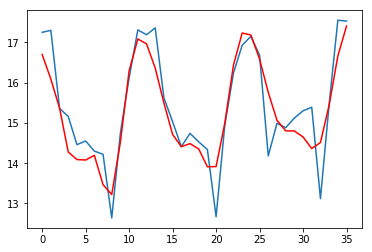

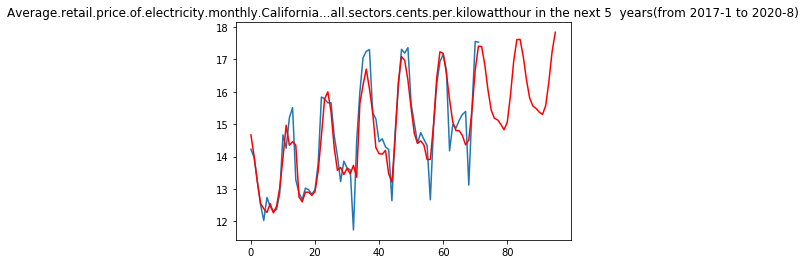

In [125]:
# use time series predict retail price directly ***3 years

from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
#series = Series.from_csv('Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour.csv', header=0)
series = old_data['Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour']
# split dataset
X = series.values
train, test = X[0:len(X)-12*3], X[len(X)-12*3:]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
#for i in range(len(predictions)):
#    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % error)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

# print the predicted data (the bule one is the real data, the red one is the predicted data)
predictions = model_fit.predict(start=len(train)-12*3, end=len(train)+len(test)-1+2*12, dynamic=False)
pyplot.plot(X[len(train)-12*3:])
pyplot.plot(predictions, color='red')
pyplot.title('Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour in the next 5  years(from 2017-1 to 2020-8)')
pyplot.show()

In [126]:
# use time series predict retail price directly ***5 years

from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
#series = Series.from_csv('Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour.csv', header=0)

ARIMA_old_data = old_data
RMSE_AR_list = list()

for i in range(len(list(old_data))):
    series = old_data[list(old_data)[i]]
    # split dataset
    X = series.values
    train, test = X[0:len(X)-12*5], X[len(X)-12*5:]
    # train autoregression
    model = AR(train)
    model_fit = model.fit()
    print('Lag: %s' % model_fit.k_ar)
    print('Coefficients: %s' % model_fit.params)
    # make predictions
    predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
    #for i in range(len(predictions)):
    #    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
    error = sqrt(mean_squared_error(test, predictions))
    RMSE_AR_list.append(error)
    print('Test RMSE: %.3f' % error)
    # plot results
    #pyplot.plot(test)
    #pyplot.plot(predictions, color='red')
    #pyplot.show()

    # print the predicted data (the bule one is the real data, the red one is the predicted data)
    predictions = model_fit.predict(start=len(train)-12*3, end=len(train)+len(test)-1+2*12, dynamic=False)
    #pyplot.plot(X[len(train)-12*5:])
    #pyplot.plot(predictions, color='red')
    #pyplot.title('Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour in the next 5  years(from 2017-1 to 2020-8)')
    #pyplot.show()
    
    
    ARIMA_ser =  pd.concat([pd.DataFrame(X[0:len(X)-12*5]), pd.DataFrame(predictions[-60:])], ignore_index=True)
    ARIMA_old_data[list(old_data)[i]] = ARIMA_ser
    
print(RMSE_AR_list)    
ARIMA_drop_data = ARIMA_old_data


for i in range(len(RMSE_AR_list)):
    if RMSE_AR_list[i] > 2:
        ARIMA_drop_data = ARIMA_drop_data.drop(list(ARIMA_old_data)[i],axis=1)

    
ARIMA_drop_data


#RMSE_AR_list



Lag: 13
Coefficients: [-14.76922573   0.74320273  -0.06131701   0.20106602  -0.20800833
   0.24589805  -0.02061057  -0.07765374   0.11963303  -0.10397828
   0.12118417  -0.0317824    0.53386116  -0.3811517 ]
Test RMSE: 333.503
Lag: 13
Coefficients: [ -1.26710579e+02   4.87864226e-01   8.24556669e-02   1.30351142e-01
  -2.00133294e-01   1.03494857e-01  -9.93260196e-02   6.73815616e-02
  -1.22746783e-01   1.62958963e-01   8.39564336e-02   1.04811570e-01
   5.59537694e-01  -2.85961827e-01]
Test RMSE: 941.239
Lag: 13
Coefficients: [  7.49632370e+01   3.26144276e-01   2.53875981e-01   1.95858467e-01
   1.43374303e-01   9.95337392e-02   6.34295448e-02   3.69981887e-02
   1.66651255e-02  -1.22795759e-03  -1.94093731e-02  -3.95310762e-02
  -5.73697373e-02  -5.60444554e-02]
Test RMSE: 188.462
Lag: 13
Coefficients: [ 3.54888423  0.71134312  0.13115215  0.0188448   0.05522098  0.0680199
 -0.0630475  -0.02082462 -0.02991464 -0.01799293 -0.04244552 -0.02935764
  0.8419628  -0.62745815]
Test RMSE: 1

GeoConsump.TrillBtu.  \
0               14.612000   
1               12.812000   
2               14.206000   
3               13.162000   
4               12.980000   
5               13.088000   
6               14.087000   
7               13.970000   
8               13.617000   
9               13.913000   
10              13.805000   
11              14.208000   
12              15.114000   
13              13.339000   
14              14.682000   
15              13.292000   
16              14.386000   
17              13.659000   
18              14.857000   
19              14.500000   
20              14.109000   
21              14.581000   
22              14.051000   
23              14.594000   
24              15.061000   
25              13.547000   
26              14.607000   
27              14.062000   
28              14.160000   
29              14.633000   
..                    ...   
169             18.880427   
170             19.215875   
171             18.795921   
172             19.300823   
173             18.833792   
174             19.216828   
175             19.126449   
176             19.036431   
177             19.349294   
178             18.944396   
179             19.446063   
180             19.117385   
181             19.210152   
182             19.450640   
183             19.095564   
184             19.565155   
185             19.130677   
186             19.503598   
187             19.388512   
188             19.338173   
189             19.609587   
190             19.244276   
191             19.709603   
192             19.390563   
193             19.522516   
194             19.688464   
195             19.395263   
196             19.824624   
197             19.421705   
198             19.783127   

     Electricity.Net.Generation..Commercial.Sector..Billion.Kilowatthours.  \
0                                             0.629000                       
1                                             0.548000                       
2                                             0.553000                       
3                                             0.550000                       
4                                             0.575000                       
5                                             0.598000                       
6                                             0.732000                       
7                                             0.814000                       
8                                             0.636000                       
9                                             0.622000                       
10                                            0.548000                       
11                                            0.611000                       
12                                            0.597000                       
13                                            0.500000                       
14                                            0.573000                       
15                                            0.546000                       
16                                            0.566000                       
17                                            0.642000                       
18                                            0.743000                       
19                                            0.797000                       
20                                            0.676000                       
21                                            0.600000                       
22                                            0.554000                       
23                                            0.622000                       
24                                            0.617000                       
25                                            0.550000                       
26                                            0.594000                       
27                    

In [127]:
ARIMA_drop_data.to_csv('EPPdf10.csv', sep=',')

In [128]:
ARIMA_ser =  pd.concat([pd.DataFrame(X[0:len(X)-12*5]), pd.DataFrame(predictions[-60:])], ignore_index=True)
ARIMA_ser

0
0     8.710000
1     9.630000
2     9.890000
3     9.880000
4     9.820000
5    11.340000
6    13.470000
7    13.120000
8    13.130000
9    12.740000
10   11.160000
11   11.070000
12   11.320000
13   11.170000
14   11.350000
15   10.990000
16   12.110000
17   12.750000
18   13.770000
19   13.270000
20   12.240000
21   12.680000
22   12.090000
23   11.940000
24   11.520000
25   11.650000
26   10.620000
27   11.730000
28   12.150000
29   13.000000
..         ...
169  12.661462
170  12.766808
171  12.955904
172  13.200002
173  13.399699
174  13.452158
175  13.322895
176  13.079902
177  12.848938
178  12.707436
179  12.656484
180  12.662643
181  12.711619
182  12.814345
183  12.978275
184  13.173265
185  13.321289
186  13.346164
187  13.230477
188  13.033674
189  12.847611
190  12.730556
191  12.688524
192  12.700554
193  12.753507
194  12.850443
195  12.991349
196  13.146317
197  13.254157
198  13.260558

[199 rows x 1 columns]